In [24]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
movie_data = pl.scan_csv('movie_data_1.csv',null_values=['N/A'])

In [3]:
movie_data.schema

OrderedDict([('movieId', Int64),
             ('genres', String),
             ('userId', Int64),
             ('rating', Float64),
             ('Title', String),
             ('Year', String),
             ('Rated', String),
             ('Runtime', String),
             ('Genre', String),
             ('Director', String),
             ('Actors', String),
             ('Plot', String),
             ('Language', String),
             ('Country', String),
             ('Poster', String),
             ('imdbRating', Float64),
             ('Type', String)])

In [3]:
data = movie_data.collect()
data.head()

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
i64,str,i64,f64,str,str,str,str,str,str,str,str,str,str,str,f64,str
5267,"""Drama""",42270,2.5,"""Rookie""","""2021""",null,"""90 min""","""Drama""","""Lieven Van Bae…","""Matteo Simoni,…","""'Rookie' is a …","""Dutch""","""Belgium""","""https://m.medi…",null,"""movie"""
256,"""Comedy|Sci-Fi""",209929,1.0,"""Junior""","""1994""","""PG-13""","""109 min""","""Comedy, Romanc…","""Ivan Reitman""","""Arnold Schwarz…","""As part of a f…","""German, Englis…","""United States""","""https://m.medi…",4.7,"""movie"""
6539,"""Action|Adventu…",238309,5.0,"""Pirates of the…","""2003""","""PG-13""","""143 min""","""Action, Advent…","""Gore Verbinski…","""Johnny Depp, G…","""Blacksmith Wil…","""English""","""United States""","""https://m.medi…",8.1,"""movie"""
94677,"""Comedy""",186814,5.0,"""Dictator""","""2016""","""Not Rated""","""155 min""","""Action, Drama""","""Sriwass""","""Nandamuri Bala…","""Chandu lives a…","""Telugu""","""India""","""https://m.medi…",4.1,"""movie"""
71535,"""Action|Comedy|…",225147,5.0,"""Zombieland""","""2009""","""R""","""88 min""","""Action, Comedy…","""Ruben Fleische…","""Jesse Eisenber…","""A shy student …","""English, Spani…","""United States""","""https://m.medi…",7.6,"""movie"""


In [58]:
data.columns

['movieId',
 'genres',
 'userId',
 'rating',
 'Title',
 'Year',
 'Rated',
 'Runtime',
 'Genre',
 'Director',
 'Actors',
 'Plot',
 'Language',
 'Country',
 'Poster',
 'imdbRating',
 'Type']

In [97]:
data.null_count()

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,2137,908,66,1190,339,536,214,113,797,621,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


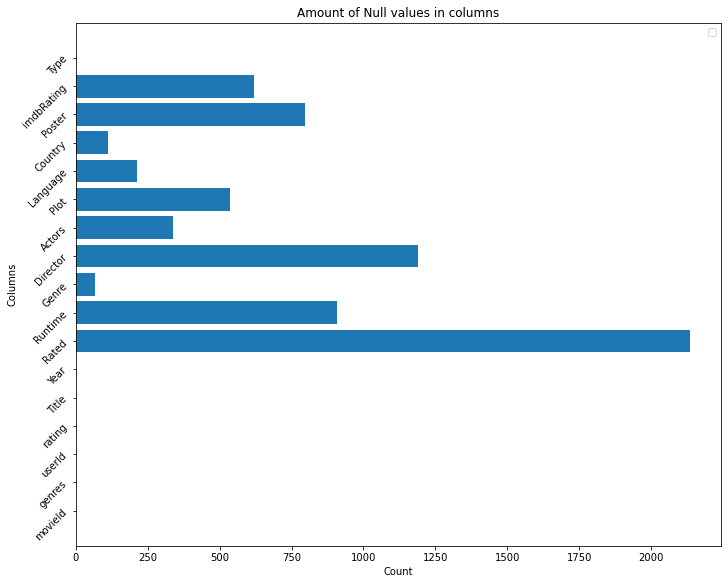

In [5]:
fig, ax = plt.subplots(figsize=(10, 8), layout='constrained')

ax.barh([col for col in data.columns],data.null_count().to_numpy().reshape(-1))
ax.set_xlabel('Count')
ax.set_ylabel('Columns')
plt.yticks(rotation=45)
ax.set_title('Amount of Null values in columns')
ax.legend()

In [138]:
#Rated Column

data['Rated'].value_counts()

Rated,count
str,u32
"""TV-Y7""",14
"""18+""",29
"""13+""",13
"""Not Rated""",670
"""X""",32
"""PG-13""",8125
"""Unrated""",51
"""M/PG""",1
"""TV-MA""",184


In [32]:
data['Rated'].value_counts()['Rated'].to_numpy()

array(['TV-14', 'TV-Y7', 'Unrated', '18+', 'Approved', 'TV-G', 'R',
       'TV-MA', 'Not Rated', 'G', 'X', 'TV-PG', 'M', '13+', 'M/PG',
       'NC-17', 'PG-13', 'PG', 'GP', None, 'Passed'], dtype=object)

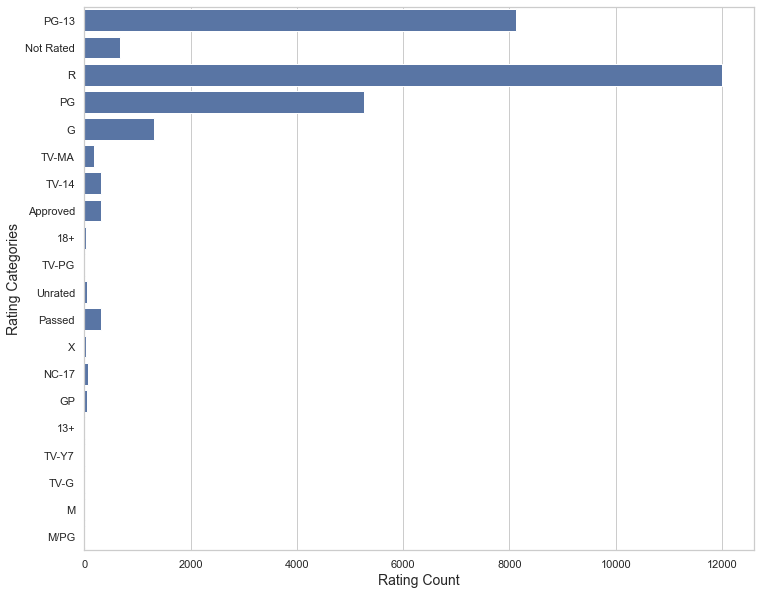

In [42]:
plt.figure(figsize=(12,10))
sns.set_theme(style="whitegrid")

sns.countplot(data['Rated'],legend=True)
plt.ylabel("Rating Categories",fontsize=14)
plt.xlabel('Rating Count',fontsize=14)
plt.show()

In [48]:
data.group_by(["Rated","Country"]).agg(pl.count())

Rated,Country,count
str,str,u32
"""PG-13""","""United States""",5018
"""Not Rated""","""India""",67
"""PG""","""United States,…",99
null,"""South Korea""",89
null,"""Greece""",22
"""PG""","""United States,…",88
"""G""","""United States""",383
"""R""","""Brazil, United…",8
"""PG""","""Soviet Union""",12


In [4]:
def ratings_inconsistence(x):
    if x=="Unrated":
        return "Not Rated"
    elif x =="X":
        return "NC-17"
    elif x=="M/PG" or x=="M" or x=="GP":
        return "PG"  
    return x

In [142]:
data.with_columns(pl.col("Rated").map_elements(ratings_inconsistence))['Rated'].value_counts()

Rated,count
str,u32
"""Approved""",304
"""TV-14""",319
null,2137
"""TV-Y7""",14
"""TV-G""",6
"""TV-PG""",17
"""Not Rated""",721
"""R""",12004
"""Passed""",308


In [5]:
data = data.with_columns(pl.col("Rated").map_elements(ratings_inconsistence))

In [147]:
data['Rated'].value_counts()

Rated,count
str,u32
null,2137
"""PG""",5311
"""TV-PG""",17
"""Passed""",308
"""TV-14""",319
"""18+""",29
"""Not Rated""",721
"""TV-MA""",184
"""Approved""",304


In [146]:
#data.with_columns(pl.col("Rated").map_elements(lambda x:''.join(x.split('-'))))['Rated'].value_counts()

Rated,count
str,u32
"""Passed""",308
"""TVMA""",184
"""13+""",13
"""18+""",29
"""PG13""",8125
"""TVPG""",17
"""NC17""",102
"""PG""",5311
"""TVG""",6


In [51]:
data.columns

['movieId',
 'genres',
 'userId',
 'rating',
 'Title',
 'Year',
 'Rated',
 'Runtime',
 'Genre',
 'Director',
 'Actors',
 'Plot',
 'Language',
 'Country',
 'Poster',
 'imdbRating',
 'Type']

In [55]:
data.null_count()

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,2137,908,66,1190,339,536,214,113,797,621,0


In [64]:
data.select(pl.col("Actors")).null_count()

Actors
u32
339


In [6]:
data.filter(pl.col('Actors').is_null() & pl.col("Rated").is_not_null())

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
i64,str,i64,f64,str,str,str,str,str,str,str,str,str,str,str,f64,str
152,"""Drama|Horror""",231289,1.0,"""Addiction""","""2007""","""TV-14""","""86 min""","""Documentary""","""Jon Alpert, Jo…",null,"""A documentary …","""English""","""United States""","""https://m.medi…",6.4,"""movie"""
157373,"""Animation|Come…",217625,4.0,"""It's Such a Be…","""2012""","""Not Rated""","""62 min""","""Animation, Com…","""Don Hertzfeldt…",null,"""Bill struggles…","""English""","""United States""","""https://m.medi…",8.2,"""movie"""
152,"""Drama|Horror""",53354,5.0,"""Addiction""","""2007""","""TV-14""","""86 min""","""Documentary""","""Jon Alpert, Jo…",null,"""A documentary …","""English""","""United States""","""https://m.medi…",6.4,"""movie"""
152,"""Drama|Horror""",228235,5.0,"""Addiction""","""2007""","""TV-14""","""86 min""","""Documentary""","""Jon Alpert, Jo…",null,"""A documentary …","""English""","""United States""","""https://m.medi…",6.4,"""movie"""
99764,"""Animation|Come…",101952,3.0,"""It's Such a Be…","""2012""","""Not Rated""","""62 min""","""Animation, Com…","""Don Hertzfeldt…",null,"""Bill struggles…","""English""","""United States""","""https://m.medi…",8.2,"""movie"""


Majority of data where Runtime is Null has actors, directors also null, meaning the movie may have not come out or fully sorted out when the data was taken

In [121]:
data['Actors'].unique().to_numpy()

array(['Steve Carell, Morgan Freeman, Lauren Graham',
       'Kate Hudson, Dane Cook, Jason Biggs',
       'Cherley Kane, Eoin Kernan, Jaye Palmer', ...,
       'Madeline Brewer, Patch Darragh, Melora Walters',
       'Ryan Gosling, Emily Mortimer, Paul Schneider',
       'Aamir Khan, Madhavan, Mona Singh'], dtype=object)

In [7]:
data_no_null = data.drop_nulls()

In [155]:
data.filter(pl.col('Type')!="series").filter(pl.col('Director').is_null())

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
i64,str,i64,f64,str,str,str,str,str,str,str,str,str,str,str,f64,str
969,"""Adventure|Come…",330411,3.0,"""African Queen""","""2000""","""NC-17""","""300 min""","""Adult""",null,"""Kim Eternity, …",null,"""English""","""USA""",null,null,"""movie"""
969,"""Adventure|Come…",37790,3.0,"""African Queen""","""2000""","""NC-17""","""300 min""","""Adult""",null,"""Kim Eternity, …",null,"""English""","""USA""",null,null,"""movie"""
2090,"""Adventure|Anim…",105452,4.5,"""Rescuers""","""2015""",null,null,null,null,null,null,"""English""","""Russia""",null,null,"""movie"""
969,"""Adventure|Come…",95984,4.0,"""African Queen""","""2000""","""NC-17""","""300 min""","""Adult""",null,"""Kim Eternity, …",null,"""English""","""USA""",null,null,"""movie"""
3703,"""Action|Adventu…",88658,4.0,"""Road Warrior""","""2007""",null,null,"""Short, Sci-Fi""",null,"""Celestine""",null,"""English""","""United States""",null,null,"""movie"""
3267,"""Action|Crime|T…",83489,5.0,"""Mariachi""","""1993""",null,null,"""Musical""",null,"""David Reynoso,…",null,"""Spanish""","""Mexico""","""https://m.medi…",6.7,"""movie"""
1726,"""Action|Adventu…",88968,3.0,"""Postman""","""1999""","""Not Rated""","""145 min""","""Action, Drama""",null,"""Mohan Babu, So…","""Postman is a f…","""Telugu""","""India""","""https://m.medi…",3.6,"""movie"""
2194,"""Action|Crime|D…",108253,5.0,"""Untouchables""","""2011""",null,null,"""Short""",null,null,null,null,null,null,8.7,"""movie"""
2194,"""Action|Crime|D…",256904,4.0,"""Untouchables""","""2011""",null,null,"""Short""",null,null,null,null,null,null,8.7,"""movie"""


In [132]:
k = 0
for row in data['Director'].unique().to_numpy().reshape(-1):
    k += 1
    if row != None:
        print(row)
        
print(k)

Demian Lichtenstein
Robert Michael Lewis
Zacharias Kunuk, Natar Ungalaaq
Antony Hoffman
Matt Bettinelli-Olpin, Tyler Gillett
Hayao Miyazaki
Gary Ross
Aaron Nee, Adam Nee
Clint Eastwood
Dean DeBlois
Jonathan Kaplan
Scott Cooper
Jared Cohn
Oliver Hirschbiegel
Luc Besson
Jie Hao
Louis C.K.
Rawson Marshall Thurber
Anurag Basu
Hal Needham
Guillermo del Toro
Wolfgang Petersen
Mike Judge, Mike de Seve, Brian Mulroney
Shane Black
David Koepp
Nancy Meyers
Sean Penn
John Murlowski
Patrick Tatopoulos
Brian Levant
Joseph Kosinski
Shannon Hartman
David Anspaugh
Emilio Estevez
Martin Ritt
Billy Ray
Stefan Ruzowitzky
Mike Barker
Tamra Davis
Adrian Grunberg
Sergio Corbucci
Scott Hicks
Robert Wise
Mike Lenzini
Josh Boone
William Shatner
Takeshi Kitano
Philip Shaw
J.C. Chandor
Tom Shadyac
David Mirkin
Juan Zapata
Andrew Adamson, Kelly Asbury, Conrad Vernon
Pierre Morel
Danny DeVito
Roland Emmerich
Jay Levey
Michael Schultz
John Lasseter, Ash Brannon, Lee Unkrich
Mark Dindal
Ari Aster
Pedro Almodóvar
Jam

In [8]:
data_1 = data.with_columns(pl.col("Year").map_elements(lambda x: x.split('–')[0]).cast(pl.Int32))

In [9]:
data_1['Year'].value_counts().sort(by="count",descending=True)

Year,count
i32,u32
1995,1723
1994,1431
1999,1293
1993,1280
2000,1278
1997,1167
2002,1140
1996,1111
2004,954


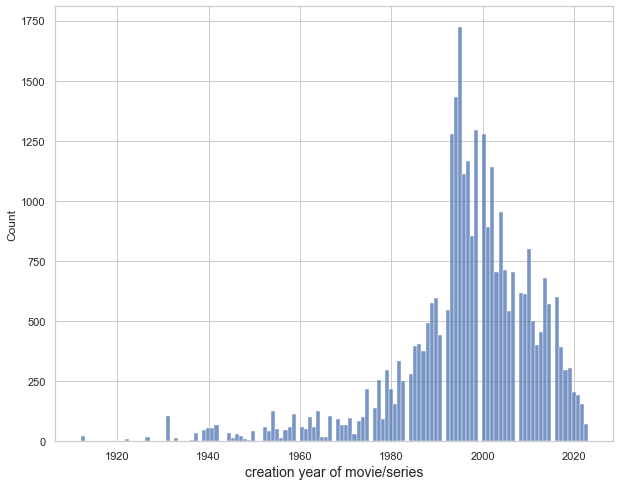

In [190]:
plt.figure(figsize=(10,8))
sns.histplot(data_1['Year'].to_numpy())
plt.xlabel("creation year of movie/series",fontsize=14)
plt.xticks()
plt.show()

In [191]:
data_1.columns

['movieId',
 'genres',
 'userId',
 'rating',
 'Title',
 'Year',
 'Rated',
 'Runtime',
 'Genre',
 'Director',
 'Actors',
 'Plot',
 'Language',
 'Country',
 'Poster',
 'imdbRating',
 'Type']

In [222]:
data_1.select(pl.col("genres").map_elements(lambda x: x.split('|'))).explode('genres')['genres'].value_counts()

genres,count
str,u32
"""Comedy""",10707
"""IMAX""",1609
"""Romance""",5715
"""Mystery""",2407
"""Horror""",2286
"""War""",1831
"""Adventure""",7755
"""Western""",594
"""Thriller""",8779


In [223]:
data_1.select(pl.col("genres").map_elements(lambda x: x.split('|'))).explode('genres')['genres'].value_counts()['count']

count
u32
5715
13510
594
2125
2744
10707
6581
5356
1173


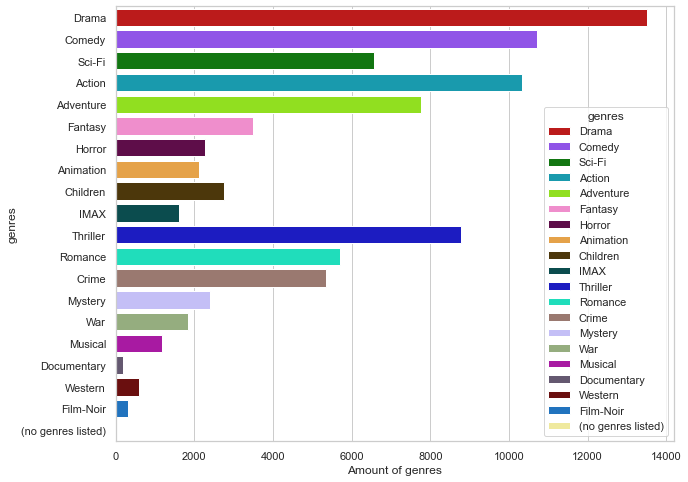

In [224]:
plt.figure(figsize=(10,8))
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=20)
sns.countplot(y=data_1.select(pl.col("genres").map_elements(lambda x: x.split('|'))).explode('genres')['genres'],
              hue=data_1.select(pl.col("genres").map_elements(lambda x: x.split('|'))).explode('genres')['genres'],
              palette=palette,legend=True)
plt.xlabel("Amount of genres")
plt.show()

In [259]:
data_1.with_columns(pl.col("genres").map_elements(lambda x: x.split('|'))).explode('genres')

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
i64,str,i64,f64,str,i32,str,str,str,str,str,str,str,str,str,f64,str
5267,"""Drama""",42270,2.5,"""Rookie""",2021,null,"""90 min""","""Drama""","""Lieven Van Bae…","""Matteo Simoni,…","""'Rookie' is a …","""Dutch""","""Belgium""","""https://m.medi…",null,"""movie"""
256,"""Comedy""",209929,1.0,"""Junior""",1994,"""PG-13""","""109 min""","""Comedy, Romanc…","""Ivan Reitman""","""Arnold Schwarz…","""As part of a f…","""German, Englis…","""United States""","""https://m.medi…",4.7,"""movie"""
256,"""Sci-Fi""",209929,1.0,"""Junior""",1994,"""PG-13""","""109 min""","""Comedy, Romanc…","""Ivan Reitman""","""Arnold Schwarz…","""As part of a f…","""German, Englis…","""United States""","""https://m.medi…",4.7,"""movie"""
6539,"""Action""",238309,5.0,"""Pirates of the…",2003,"""PG-13""","""143 min""","""Action, Advent…","""Gore Verbinski…","""Johnny Depp, G…","""Blacksmith Wil…","""English""","""United States""","""https://m.medi…",8.1,"""movie"""
6539,"""Adventure""",238309,5.0,"""Pirates of the…",2003,"""PG-13""","""143 min""","""Action, Advent…","""Gore Verbinski…","""Johnny Depp, G…","""Blacksmith Wil…","""English""","""United States""","""https://m.medi…",8.1,"""movie"""
6539,"""Comedy""",238309,5.0,"""Pirates of the…",2003,"""PG-13""","""143 min""","""Action, Advent…","""Gore Verbinski…","""Johnny Depp, G…","""Blacksmith Wil…","""English""","""United States""","""https://m.medi…",8.1,"""movie"""
6539,"""Fantasy""",238309,5.0,"""Pirates of the…",2003,"""PG-13""","""143 min""","""Action, Advent…","""Gore Verbinski…","""Johnny Depp, G…","""Blacksmith Wil…","""English""","""United States""","""https://m.medi…",8.1,"""movie"""
94677,"""Comedy""",186814,5.0,"""Dictator""",2016,"""Not Rated""","""155 min""","""Action, Drama""","""Sriwass""","""Nandamuri Bala…","""Chandu lives a…","""Telugu""","""India""","""https://m.medi…",4.1,"""movie"""
71535,"""Action""",225147,5.0,"""Zombieland""",2009,"""R""","""88 min""","""Action, Comedy…","""Ruben Fleische…","""Jesse Eisenber…","""A shy student …","""English, Spani…","""United States""","""https://m.medi…",7.6,"""movie"""


In [234]:
data_1.filter(pl.col("Genre").is_null() & (pl.col("genres")=="(no genres listed)"))

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
i64,str,i64,f64,str,i32,str,str,str,str,str,str,str,str,str,f64,str


We use both genre to fill each other were it does not exist

In [255]:
data_1.filter(pl.col("Genre").is_null())['genres'].to_numpy()

array(['Comedy|Crime', 'Adventure|Animation|Children|Crime|Drama',
       'Comedy|Crime', 'Comedy|Crime', 'Comedy|Crime',
       'Adventure|Western', 'Adventure|Animation|Children|Crime|Drama',
       'Comedy', 'Comedy', 'Comedy|Crime', 'Comedy|Crime',
       'Action|Adventure|Thriller', 'Comedy|Crime', 'Comedy', 'Comedy',
       'Comedy|Crime', 'Adventure|Western', 'Comedy|Crime',
       'Comedy|Crime', 'Comedy|Crime', 'Comedy', 'Adventure|Western',
       'Comedy', 'Comedy|Crime', 'Comedy', 'Comedy|Crime',
       'Adventure|Animation|Children|Crime|Drama', 'Comedy|Crime',
       'Comedy', 'Comedy|Crime',
       'Adventure|Animation|Children|Crime|Drama', 'Comedy|Crime',
       'Comedy|Crime', 'Adventure|Animation|Children|Crime|Drama',
       'Comedy|Crime', 'Action|Adventure|Thriller', 'Comedy',
       'Adventure|Western', 'Comedy|Crime', 'Comedy|Crime',
       'Action|Adventure|Thriller',
       'Adventure|Animation|Children|Crime|Drama', 'Comedy|Crime',
       'Comedy|Crime', 'Act

In [10]:
data_2 = data_1.with_columns(pl.when(pl.col("Genre").is_null()).then(pl.col("genres")).otherwise(pl.col("Genre")).alias("Genres"))
data_2

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
i64,str,i64,f64,str,i32,str,str,str,str,str,str,str,str,str,f64,str,str
5267,"""Drama""",42270,2.5,"""Rookie""",2021,null,"""90 min""","""Drama""","""Lieven Van Bae…","""Matteo Simoni,…","""'Rookie' is a …","""Dutch""","""Belgium""","""https://m.medi…",null,"""movie""","""Drama"""
256,"""Comedy|Sci-Fi""",209929,1.0,"""Junior""",1994,"""PG-13""","""109 min""","""Comedy, Romanc…","""Ivan Reitman""","""Arnold Schwarz…","""As part of a f…","""German, Englis…","""United States""","""https://m.medi…",4.7,"""movie""","""Comedy, Romanc…"
6539,"""Action|Adventu…",238309,5.0,"""Pirates of the…",2003,"""PG-13""","""143 min""","""Action, Advent…","""Gore Verbinski…","""Johnny Depp, G…","""Blacksmith Wil…","""English""","""United States""","""https://m.medi…",8.1,"""movie""","""Action, Advent…"
94677,"""Comedy""",186814,5.0,"""Dictator""",2016,"""Not Rated""","""155 min""","""Action, Drama""","""Sriwass""","""Nandamuri Bala…","""Chandu lives a…","""Telugu""","""India""","""https://m.medi…",4.1,"""movie""","""Action, Drama"""
71535,"""Action|Comedy|…",225147,5.0,"""Zombieland""",2009,"""R""","""88 min""","""Action, Comedy…","""Ruben Fleische…","""Jesse Eisenber…","""A shy student …","""English, Spani…","""United States""","""https://m.medi…",7.6,"""movie""","""Action, Comedy…"
87222,"""Action|Adventu…",45226,4.0,"""Kung Fu Panda …",2011,"""PG""","""90 min""","""Animation, Act…","""Jennifer Yuh N…","""Jack Black, An…","""Po and his fri…","""English, Russi…","""United States,…","""https://m.medi…",7.2,"""movie""","""Animation, Act…"
4718,"""Comedy""",74971,2.5,"""American Pie 2…",2001,"""R""","""108 min""","""Comedy""","""J.B. Rogers""","""Jason Biggs, S…","""Jim and his fr…","""English""","""United States""","""https://m.medi…",6.4,"""movie""","""Comedy"""
48394,"""Drama|Fantasy|…",262586,4.5,"""Pan's Labyrint…",2006,"""R""","""118 min""","""Drama, Fantasy…","""Guillermo del …","""Ivana Baquero,…","""In the Falangi…","""Spanish""","""Mexico, Spain""","""https://m.medi…",8.2,"""movie""","""Drama, Fantasy…"
180,"""Comedy|Romance…",248601,3.0,"""Mallrats""",1995,"""R""","""94 min""","""Comedy, Romanc…","""Kevin Smith""","""Shannen Dohert…","""Both dumped by…","""English""","""United States""","""https://m.medi…",7.0,"""movie""","""Comedy, Romanc…"


In [257]:
data_2.null_count()

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,2137,908,66,1190,339,536,214,113,797,621,0,0


In [266]:
data_2.filter(pl.col("Genre").is_null())

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
i64,str,i64,f64,str,i32,str,str,str,str,str,str,str,str,str,f64,str,str
1234,"""Comedy|Crime""",108201,4.0,"""Sting""",1995,null,null,null,"""Homayoon Ass'a…","""Jamshid Hashem…","""'Nish' is a no…","""Persian""","""Iran""","""https://m.medi…",5.2,"""movie""","""Comedy|Crime"""
2090,"""Adventure|Anim…",105452,4.5,"""Rescuers""",2015,null,null,null,null,null,null,"""English""","""Russia""",null,null,"""movie""","""Adventure|Anim…"
1234,"""Comedy|Crime""",26416,3.0,"""Sting""",1995,null,null,null,"""Homayoon Ass'a…","""Jamshid Hashem…","""'Nish' is a no…","""Persian""","""Iran""","""https://m.medi…",5.2,"""movie""","""Comedy|Crime"""
1234,"""Comedy|Crime""",323803,4.0,"""Sting""",1995,null,null,null,"""Homayoon Ass'a…","""Jamshid Hashem…","""'Nish' is a no…","""Persian""","""Iran""","""https://m.medi…",5.2,"""movie""","""Comedy|Crime"""
1234,"""Comedy|Crime""",66244,4.0,"""Sting""",1995,null,null,null,"""Homayoon Ass'a…","""Jamshid Hashem…","""'Nish' is a no…","""Persian""","""Iran""","""https://m.medi…",5.2,"""movie""","""Comedy|Crime"""
4327,"""Adventure|West…",277803,1.5,"""Magnificent Se…",1991,null,"""60 min""",null,null,"""Fawna, Delta F…",null,"""English""","""USA""",null,null,"""movie""","""Adventure|West…"
2090,"""Adventure|Anim…",279111,4.0,"""Rescuers""",2015,null,null,null,null,null,null,"""English""","""Russia""",null,null,"""movie""","""Adventure|Anim…"
514,"""Comedy""",8240,3.5,"""Ref""",2014,null,null,null,null,null,null,"""Kurdish""","""Turkey""",null,null,"""series""","""Comedy"""
514,"""Comedy""",31378,5.0,"""Ref""",2014,null,null,null,null,null,null,"""Kurdish""","""Turkey""",null,null,"""series""","""Comedy"""


In [12]:
data_3 = data_2.with_columns(pl.col("Genres").map_elements(lambda x:', '.join(x.split('|') )))
data_3.filter(pl.col("Genre").is_null())

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
i64,str,i64,f64,str,i32,str,str,str,str,str,str,str,str,str,f64,str,str
1234,"""Comedy|Crime""",108201,4.0,"""Sting""",1995,null,null,null,"""Homayoon Ass'a…","""Jamshid Hashem…","""'Nish' is a no…","""Persian""","""Iran""","""https://m.medi…",5.2,"""movie""","""Comedy, Crime"""
2090,"""Adventure|Anim…",105452,4.5,"""Rescuers""",2015,null,null,null,null,null,null,"""English""","""Russia""",null,null,"""movie""","""Adventure, Ani…"
1234,"""Comedy|Crime""",26416,3.0,"""Sting""",1995,null,null,null,"""Homayoon Ass'a…","""Jamshid Hashem…","""'Nish' is a no…","""Persian""","""Iran""","""https://m.medi…",5.2,"""movie""","""Comedy, Crime"""
1234,"""Comedy|Crime""",323803,4.0,"""Sting""",1995,null,null,null,"""Homayoon Ass'a…","""Jamshid Hashem…","""'Nish' is a no…","""Persian""","""Iran""","""https://m.medi…",5.2,"""movie""","""Comedy, Crime"""
1234,"""Comedy|Crime""",66244,4.0,"""Sting""",1995,null,null,null,"""Homayoon Ass'a…","""Jamshid Hashem…","""'Nish' is a no…","""Persian""","""Iran""","""https://m.medi…",5.2,"""movie""","""Comedy, Crime"""
4327,"""Adventure|West…",277803,1.5,"""Magnificent Se…",1991,null,"""60 min""",null,null,"""Fawna, Delta F…",null,"""English""","""USA""",null,null,"""movie""","""Adventure, Wes…"
2090,"""Adventure|Anim…",279111,4.0,"""Rescuers""",2015,null,null,null,null,null,null,"""English""","""Russia""",null,null,"""movie""","""Adventure, Ani…"
514,"""Comedy""",8240,3.5,"""Ref""",2014,null,null,null,null,null,null,"""Kurdish""","""Turkey""",null,null,"""series""","""Comedy"""
514,"""Comedy""",31378,5.0,"""Ref""",2014,null,null,null,null,null,null,"""Kurdish""","""Turkey""",null,null,"""series""","""Comedy"""


In [19]:
data_4 = data_3.with_columns(pl.col("Runtime").map_elements(lambda x:x.split('m')[0].split('S')[0].strip(' ')))

In [20]:
data_4['Runtime'].unique().to_numpy()

array(['80', '103', '58', '178', '4', '132', '46', '75', '30', '105',
       '137', '146', '87', '191', '76', '81', '74', '73', '169', '121',
       '70', '143', '163', '28', '183', '131', '165', '97', '208', '95',
       '194', '120', '43', '55', '142', '187', '161', '134', '3', '29',
       '144', '114', '2', '50', '6', '57', '109', '170', '8', '71', '176',
       '72', '60', '136', '98', '25', '1', '11', '90', '195', '238',
       '100', '175', '138', '21', '119', '181', '42', '99', '192', '145',
       '185', '160', '130', '182', '93', '78', None, '125', '157', '139',
       '24', '12', '82', '26', '89', '154', '116', '63', '123', '79',
       '91', '88', '148', '156', '141', '133', '218', '164', '151', '62',
       '171', '86', '15', '37', '135', '107', '207', '84', '197', '101',
       '155', '111', '104', '7', '94', '69', '17', '83', '127', '85',
       '129', '212', '10', '45', '300', '64', '9', '158', '20', '115',
       '167', '140', '118', '39', '92', '77', '126', '102', '15

In [21]:
data_3.null_count()

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,2137,908,66,1190,339,536,214,113,797,621,0,0


In [336]:
data_4.filter(pl.col("Language").is_null())

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
i64,str,i64,f64,str,i32,str,str,str,str,str,str,str,str,str,f64,str,str
509,"""Drama|Romance""",278467,4.0,"""Piano""",2015,null,"""10""","""Animation, Sho…","""Kaspar Jancis""","""Kaspar Jancis,…","""Marta has acqu…",null,"""Estonia""","""https://m.medi…",null,"""movie""","""Animation, Sho…"
4995,"""Drama|Romance""",93099,4.5,"""Beautiful Mind…",2016,null,null,"""Drama, Mystery…",null,"""Jang Hyuk, Par…","""Lee Young-O is…",null,"""South Korea""","""https://m.medi…",7.7,"""series""","""Drama, Mystery…"
4995,"""Drama|Romance""",300242,4.5,"""Beautiful Mind…",2016,null,null,"""Drama, Mystery…",null,"""Jang Hyuk, Par…","""Lee Young-O is…",null,"""South Korea""","""https://m.medi…",7.7,"""series""","""Drama, Mystery…"
509,"""Drama|Romance""",6403,3.0,"""Piano""",2015,null,"""10""","""Animation, Sho…","""Kaspar Jancis""","""Kaspar Jancis,…","""Marta has acqu…",null,"""Estonia""","""https://m.medi…",null,"""movie""","""Animation, Sho…"
4995,"""Drama|Romance""",190647,5.0,"""Beautiful Mind…",2016,null,null,"""Drama, Mystery…",null,"""Jang Hyuk, Par…","""Lee Young-O is…",null,"""South Korea""","""https://m.medi…",7.7,"""series""","""Drama, Mystery…"
4756,"""Action|Adventu…",118539,1.5,"""Musketeer""",2022,null,null,"""Short, Adventu…","""Philip Shaw""","""Kevin McNally,…","""An old Muskete…",null,"""UK""","""https://m.medi…",null,"""movie""","""Short, Adventu…"
4995,"""Drama|Romance""",313878,4.5,"""Beautiful Mind…",2016,null,null,"""Drama, Mystery…",null,"""Jang Hyuk, Par…","""Lee Young-O is…",null,"""South Korea""","""https://m.medi…",7.7,"""series""","""Drama, Mystery…"
4973,"""Comedy|Romance…",226476,4.0,"""Amelie""",2017,null,null,"""Short""","""Aurore Damant,…","""Marie Carrour""",null,null,null,null,null,"""movie""","""Short"""
4995,"""Drama|Romance""",317761,4.0,"""Beautiful Mind…",2016,null,null,"""Drama, Mystery…",null,"""Jang Hyuk, Par…","""Lee Young-O is…",null,"""South Korea""","""https://m.medi…",7.7,"""series""","""Drama, Mystery…"


In [340]:
data_4.filter(pl.col(["Director",'Actors','Country']).is_null())

ComputeError: The predicate passed to 'LazyFrame.filter' expanded to multiple expressions: 

	col("Director").is_null(),
	col("Actors").is_null(),
	col("Country").is_null(),
This is ambiguous. Try to combine the predicates with the 'all' or `any' expression.

Error originated just after this operation:
DF ["movieId", "genres", "userId", "rating"]; PROJECT */18 COLUMNS; SELECTION: "None"

In [22]:
data_5 = data_4.with_columns(pl.col("Director").fill_null("no director"),pl.col("Actors").fill_null("no actor"),
                   pl.col("Rated").fill_null("Not Rated"),pl.col('Plot').fill_null('no plot'),
                    pl.col("Poster").fill_null("no poster"),pl.col('Year').cast(pl.String())).drop_nulls().drop(['genres','Genre'])

In [347]:
data_5

movieId,userId,rating,Title,Year,Rated,Runtime,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
i64,i64,f64,str,str,str,str,str,str,str,str,str,str,f64,str,str
256,209929,1.0,"""Junior""","""1994""","""PG-13""","""109""","""Ivan Reitman""","""Arnold Schwarz…","""As part of a f…","""German, Englis…","""United States""","""https://m.medi…",4.7,"""movie""","""Comedy, Romanc…"
6539,238309,5.0,"""Pirates of the…","""2003""","""PG-13""","""143""","""Gore Verbinski…","""Johnny Depp, G…","""Blacksmith Wil…","""English""","""United States""","""https://m.medi…",8.1,"""movie""","""Action, Advent…"
94677,186814,5.0,"""Dictator""","""2016""","""Not Rated""","""155""","""Sriwass""","""Nandamuri Bala…","""Chandu lives a…","""Telugu""","""India""","""https://m.medi…",4.1,"""movie""","""Action, Drama"""
71535,225147,5.0,"""Zombieland""","""2009""","""R""","""88""","""Ruben Fleische…","""Jesse Eisenber…","""A shy student …","""English, Spani…","""United States""","""https://m.medi…",7.6,"""movie""","""Action, Comedy…"
87222,45226,4.0,"""Kung Fu Panda …","""2011""","""PG""","""90""","""Jennifer Yuh N…","""Jack Black, An…","""Po and his fri…","""English, Russi…","""United States,…","""https://m.medi…",7.2,"""movie""","""Animation, Act…"
4718,74971,2.5,"""American Pie 2…","""2001""","""R""","""108""","""J.B. Rogers""","""Jason Biggs, S…","""Jim and his fr…","""English""","""United States""","""https://m.medi…",6.4,"""movie""","""Comedy"""
48394,262586,4.5,"""Pan's Labyrint…","""2006""","""R""","""118""","""Guillermo del …","""Ivana Baquero,…","""In the Falangi…","""Spanish""","""Mexico, Spain""","""https://m.medi…",8.2,"""movie""","""Drama, Fantasy…"
180,248601,3.0,"""Mallrats""","""1995""","""R""","""94""","""Kevin Smith""","""Shannen Dohert…","""Both dumped by…","""English""","""United States""","""https://m.medi…",7.0,"""movie""","""Comedy, Romanc…"
37741,13101,3.0,"""Capote""","""2005""","""R""","""114""","""Bennett Miller…","""Philip Seymour…","""In 1959, Truma…","""English""","""United States,…","""https://m.medi…",7.3,"""movie""","""Biography, Cri…"


In [23]:
data_5.write_csv("cleaned_movie_data.csv")

In [84]:
data.filter(isinstance(pl.col('Actors'))

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
i64,str,i64,f64,str,str,str,str,str,str,str,str,str,str,str,f64,str


In [76]:
data1 = data.with_columns(pl.col('genres').str.split('|'))#.select(pl.col('genres')).unique()
data1

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
i64,list[str],i64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str
265,"[""Drama"", ""Fantasy"", ""Romance""]",241684,5.0,"""Like Water for…","""1992""","""R""","""105 min""","""Drama, Romance…","""Alfonso Arau""","""Marco Leonardi…","""When tradition…","""Spanish, Engli…","""Mexico""","""https://m.medi…","""7.1""","""movie"""
2107,"[""Horror"", ""Thriller""]",15822,4.0,"""Halloween H20:…","""1998""","""R""","""86 min""","""Horror, Thrill…","""Steve Miner""","""Jamie Lee Curt…","""Laurie Strode,…","""English""","""United States""","""https://m.medi…","""5.8""","""movie"""
316,"[""Action"", ""Adventure"", ""Sci-Fi""]",30515,3.0,"""Stargate""","""1994""","""PG-13""","""116 min""","""Action, Advent…","""Roland Emmeric…","""Kurt Russell, …","""An interstella…","""English, Norwe…","""United States,…","""https://m.medi…","""7.0""","""movie"""
858,"[""Crime"", ""Drama""]",178081,5.0,"""Godfather""","""2022""","""TV-14""","""157 min""","""Action, Crime,…","""Mohan Raja""","""Chiranjeevi, S…","""After the deat…","""Tamil, Kannada…","""India""","""https://m.medi…","""5.2""","""movie"""
48,"[""Animation"", ""Children"", … ""Romance""]",113792,2.0,"""Pocahontas""","""1995""","""G""","""81 min""","""Animation, Adv…","""Mike Gabriel, …","""Mel Gibson, Li…","""An English sol…","""English, Russi…","""United States,…","""https://m.medi…","""6.7""","""movie"""
4995,"[""Drama"", ""Romance""]",144368,4.5,"""Beautiful Mind…","""2016""","""N/A""","""N/A""","""Drama, Mystery…","""N/A""","""Jang Hyuk, Par…","""Lee Young-O is…","""N/A""","""South Korea""","""https://m.medi…","""7.7""","""series"""
434,"[""Action"", ""Adventure"", ""Thriller""]",78342,3.0,"""Cliffhanger""","""1993""","""R""","""113 min""","""Action, Advent…","""Renny Harlin""","""Sylvester Stal…","""A botched mid-…","""English""","""United States,…","""https://m.medi…","""6.5""","""movie"""
539,"[""Comedy"", ""Drama"", ""Romance""]",292390,5.0,"""Sleepless in S…","""1993""","""PG""","""105 min""","""Comedy, Drama,…","""Nora Ephron""","""Tom Hanks, Meg…","""A recently wid…","""English""","""United States""","""https://m.medi…","""6.8""","""movie"""
2959,"[""Action"", ""Crime"", … ""Thriller""]",1057,4.0,"""Fight Club""","""1999""","""R""","""139 min""","""Drama""","""David Fincher""","""Brad Pitt, Edw…","""An insomniac o…","""English""","""Germany, Unite…","""https://m.medi…","""8.8""","""movie"""


In [77]:
data2 = data1.with_columns(pl.col('genres').map_elements(lambda x: ' '.join(x)))
data2

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
i64,str,i64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str
265,"""Drama Fantasy …",241684,5.0,"""Like Water for…","""1992""","""R""","""105 min""","""Drama, Romance…","""Alfonso Arau""","""Marco Leonardi…","""When tradition…","""Spanish, Engli…","""Mexico""","""https://m.medi…","""7.1""","""movie"""
2107,"""Horror Thrille…",15822,4.0,"""Halloween H20:…","""1998""","""R""","""86 min""","""Horror, Thrill…","""Steve Miner""","""Jamie Lee Curt…","""Laurie Strode,…","""English""","""United States""","""https://m.medi…","""5.8""","""movie"""
316,"""Action Adventu…",30515,3.0,"""Stargate""","""1994""","""PG-13""","""116 min""","""Action, Advent…","""Roland Emmeric…","""Kurt Russell, …","""An interstella…","""English, Norwe…","""United States,…","""https://m.medi…","""7.0""","""movie"""
858,"""Crime Drama""",178081,5.0,"""Godfather""","""2022""","""TV-14""","""157 min""","""Action, Crime,…","""Mohan Raja""","""Chiranjeevi, S…","""After the deat…","""Tamil, Kannada…","""India""","""https://m.medi…","""5.2""","""movie"""
48,"""Animation Chil…",113792,2.0,"""Pocahontas""","""1995""","""G""","""81 min""","""Animation, Adv…","""Mike Gabriel, …","""Mel Gibson, Li…","""An English sol…","""English, Russi…","""United States,…","""https://m.medi…","""6.7""","""movie"""
4995,"""Drama Romance""",144368,4.5,"""Beautiful Mind…","""2016""","""N/A""","""N/A""","""Drama, Mystery…","""N/A""","""Jang Hyuk, Par…","""Lee Young-O is…","""N/A""","""South Korea""","""https://m.medi…","""7.7""","""series"""
434,"""Action Adventu…",78342,3.0,"""Cliffhanger""","""1993""","""R""","""113 min""","""Action, Advent…","""Renny Harlin""","""Sylvester Stal…","""A botched mid-…","""English""","""United States,…","""https://m.medi…","""6.5""","""movie"""
539,"""Comedy Drama R…",292390,5.0,"""Sleepless in S…","""1993""","""PG""","""105 min""","""Comedy, Drama,…","""Nora Ephron""","""Tom Hanks, Meg…","""A recently wid…","""English""","""United States""","""https://m.medi…","""6.8""","""movie"""
2959,"""Action Crime D…",1057,4.0,"""Fight Club""","""1999""","""R""","""139 min""","""Drama""","""David Fincher""","""Brad Pitt, Edw…","""An insomniac o…","""English""","""Germany, Unite…","""https://m.medi…","""8.8""","""movie"""


In [78]:
data.filter(pl.col('genres')=="(no genres listed)")

movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
i64,str,i64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str
166024,"""(no genres lis…",147521,4.5,"""Whiplash""","""2014""","""R""","""106 min""","""Drama, Music""","""Damien Chazell…","""Miles Teller, …","""A promising yo…","""English""","""United States""","""https://m.medi…","""8.5""","""movie"""
166024,"""(no genres lis…",122153,5.0,"""Whiplash""","""2014""","""R""","""106 min""","""Drama, Music""","""Damien Chazell…","""Miles Teller, …","""A promising yo…","""English""","""United States""","""https://m.medi…","""8.5""","""movie"""
166024,"""(no genres lis…",218760,3.5,"""Whiplash""","""2014""","""R""","""106 min""","""Drama, Music""","""Damien Chazell…","""Miles Teller, …","""A promising yo…","""English""","""United States""","""https://m.medi…","""8.5""","""movie"""
166024,"""(no genres lis…",161639,5.0,"""Whiplash""","""2014""","""R""","""106 min""","""Drama, Music""","""Damien Chazell…","""Miles Teller, …","""A promising yo…","""English""","""United States""","""https://m.medi…","""8.5""","""movie"""
166024,"""(no genres lis…",215795,4.0,"""Whiplash""","""2014""","""R""","""106 min""","""Drama, Music""","""Damien Chazell…","""Miles Teller, …","""A promising yo…","""English""","""United States""","""https://m.medi…","""8.5""","""movie"""
166024,"""(no genres lis…",259921,4.0,"""Whiplash""","""2014""","""R""","""106 min""","""Drama, Music""","""Damien Chazell…","""Miles Teller, …","""A promising yo…","""English""","""United States""","""https://m.medi…","""8.5""","""movie"""


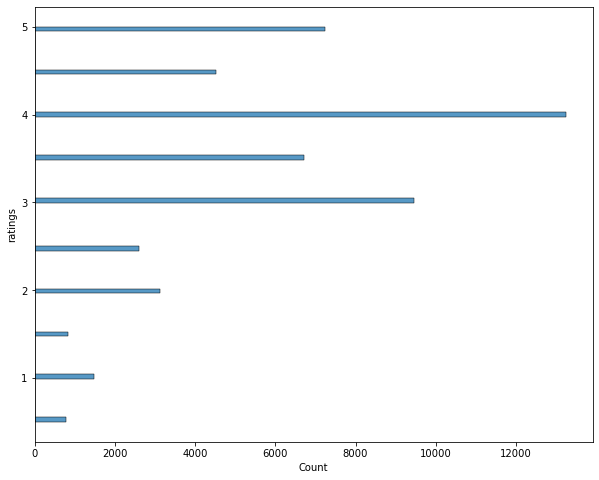

In [37]:
plt.figure(figsize=(10,8))
sns.histplot(y=data2['rating'].to_numpy())
plt.ylabel('ratings')
plt.show()

Gone with the Wind (1939)
Speed (1994)
Jaws (1975)
Hannah and Her Sisters (1986)
Antz (1998)
Basic (2003)
City of God (Cidade de Deus) (2002)
Gentlemen Broncos (2009)
Right Stuff, The (1983)
Like Water for Chocolate (Como agua para chocolate) (1992)
Cruel Intentions (1999)
Assault on VA-33 (2021)
First Wives Club, The (1996)
Babe (1995)
Grand Budapest Hotel, The (2014)
Rocky (1976)
Up (2009)
28 Days Later (2002)
Deadpool (2016)
Crow, The (1994)
Saving Private Ryan (1998)
The Men Who Built America (2012)
Gone Girl (2014)
Howl's Moving Castle (Hauru no ugoku shiro) (2004)
The Lego Movie (2014)
Red Christmas (2016)
300 (2007)
Willy Wonka & the Chocolate Factory (1971)
Forrest Gump (1994)
Godfather: Part II, The (1974)
Bridget Jones's Diary (2001)
Spirited Away (Sen to Chihiro no kamikakushi) (2001)
Matrix, The (1999)
Austin Powers in Goldmember (2002)
Pulp Fiction (1994)
Untouchables, The (1987)
Con Air (1997)
Prince and the Pauper, The (1937)
Kikujiro (Kikujirô no natsu) (1999)
Last Song

Austin Powers: International Man of Mystery (1997)
Shooter, The (1997)
Love Actually (2003)
Full Monty, The (1997)
Lilo & Stitch (2002)
Dirty Harry (1971)
National Lampoon's Van Wilder (2002)
12 Angry Men (1957)
Old Boy (2003)
Big (1988)
Dark City (1998)
I Don't Feel at Home in This World Anymore (2017)
Dodgeball: A True Underdog Story (2004)
Despicable Me (2010)
It Could Happen to You (1994)
Fight Club (1999)
Children of Men (2006)
Crow: City of Angels, The (1996)
Lord of the Rings: The Fellowship of the Ring, The (2001)
Billy Elliot (2000)
Big Short, The (2015)
Real Steel (2011)
Mummy, The (1999)
Insomnia (2002)
Man Who Knew Too Much, The (1934)
V for Vendetta (2006)
In Bruges (2008)
Diving Bell and the Butterfly, The (Scaphandre et le papillon, Le) (2007)
King Kong (2005)
Ponyo (Gake no ue no Ponyo) (2008)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Angels & Demons (2009)
13 Hours (2016)
Mummy, The (1999)
Match Point (2005)
Pawnbroker, The (1964)
T

Lord of the Rings: The Fellowship of the Ring, The (2001)
Last of the Mohicans, The (1992)
Stripes (1981)
Friday the 13th (1980)
Wyatt Earp (1994)
Kill Bill: Vol. 2 (2004)
Princess Mononoke (Mononoke-hime) (1997)
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
On the Other Side (2016)
Darkest Hour (2017)
Harry Potter and the Prisoner of Azkaban (2004)
Star Wars: Episode III - Revenge of the Sith (2005)
Catch Me If You Can (2002)
Starship Troopers (1997)
Book Thief, The (2013)
Lost in Translation (2003)
Clueless (1995)
Godfather, The (1972)
Stargate (1994)
Dolores Claiborne (1995)
Kiss the Girls (1997)
Shaun of the Dead (2004)
When Harry Met Sally... (1989)
World Is Not Enough, The (1999)
I, Robot (2004)
Despicable Me (2010)
First Knight (1995)
Casino Royale (2006)
The Autopsy of Jane Doe (2016)
Taxi Driver (1976)
Alien³ (a.k.a. Alien 3) (1992)
Exam (2009)
Crying Fist (2005)
Aliens (1986)
Terminator, The (1984)
Chasing Amy (1997)
Outbreak (1995)
Grosse Pointe B

Return of the Pink Panther, The (1975)
Dead for a Dollar (2022)
Full Monty, The (1997)
Ben-Hur (1959)
Interview with the Vampire: The Vampire Chronicles (1994)
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
Illusionist, The (2006)
Millions (2004)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Commando (1985)
You, Me and Dupree (2006)
The Trial of the Chicago 7 (2020)
Executive Decision (1996)
Mystery Men (1999)
Avengers: Age of Ultron (2015)
Matrix Revolutions, The (2003)
Collateral (2004)
Bridges of Madison County, The (1995)
Predestination (2014)
Rush Hour (1998)
Flintstones, The (1994)
Limitless (2011)
Big Night (1996)
Apollo 13 (1995)
Event Horizon (1997)
Fight Club (1999)
The Predator (2018)
Pixels (2015)
Death Machine (1995)
What's Up, Doc? (1972)
Batman (1989)
Private Parts (1997)
Monsters, Inc. (2001)
Love Hard (2021)
John Wick (2014)
Postman, The (Postino, Il) (1994)
Back to the Future Part II (1989)
Road Trip (2000)
M

Deep Blue Sea (1999)
Shiny_Flakes: The Teenage Drug Lord (2021)
Finding Nemo (2003)
Fantastic Four: Rise of the Silver Surfer (2007)
Life Is Beautiful (La Vita è bella) (1997)
Ford v. Ferrari (2019)
Lion King, The (1994)
Dad (1989)
The Trial of the Chicago 7 (2020)
Third Man, The (1949)
Rules of Attraction, The (2002)
Ice Age (2002)
Broadcast News (1987)
X-Men (2000)
Ant-Man (2015)
Dangerous Liaisons (1988)
Pulp Fiction (1994)
Monsters, Inc. (2001)
Running Man, The (1987)
Pitch Perfect 2 (2015)
Dude, Where's My Car? (2000)
The Nice Guys (2016)
Insomnia (2002)
Spaceballs (1987)
Ladies Man, The (2000)
Open Range (2003)
Seven Year Itch, The (1955)
The Personal History of David Copperfield (2019)
Elysium (2013)
Grand Illusion (La grande illusion) (1937)
Sucker Punch (2011)
Net, The (1995)
Carrie (1976)
Trainspotting (1996)
Rogue One: A Star Wars Story (2016)
Once Upon a Time in America (1984)
Fallen (1998)
Incredibles, The (2004)
Good, the Bad and the Ugly, The (Buono, il brutto, il cattiv

Matrix, The (1999)
Far and Away (1992)
Great Expectations (1998)
South Park: Bigger, Longer and Uncut (1999)
G.I. Joe: The Rise of Cobra (2009)
Billy's Hollywood Screen Kiss (1997)
Swimming with Sharks (1995)
Food, Inc. (2008)
American Beauty (1999)
Rocketeer, The (1991)
Baxter, The (2005)
Last Night (1998)
X-Men Origins: Wolverine (2009)
Nothing in Common (1986)
American President, The (1995)
Saw (2004)
Out of Africa (1985)
Walkabout (1971)
Jurassic Park (1993)
RoboCop 2 (1990)
History of Violence, A (2005)
Free Willy (1993)
Shrek (2001)
The Hallow (2015)
Men in Black (a.k.a. MIB) (1997)
Richard III (1995)
Brothers Grimm, The (2005)
Terminator, The (1984)
Love Actually (2003)
American Beauty (1999)
Into the Wild (2007)
SLC Punk! (1998)
Almost Famous (2000)
Great Escape, The (1963)
Time Traveler's Wife, The (2009)
Captain America: Civil War (2016)
Once Upon a Time... When We Were Colored (1995)
The Hunger Games: Catching Fire (2013)
Entrapment (1999)
Sound of Music, The (1965)
X-Men Or

Twins (1988)
Basquiat (1996)
Mr. & Mrs. Smith (2005)
Ratatouille (2007)
Traffic (2000)
Ed Wood (1994)
Patriot Games (1992)
Deadpool (2016)
If Beale Street Could Talk (2018)
Birdcage, The (1996)
Chicken Run (2000)
Land of Mine (2015)
Perfect Storm, The (2000)
Casablanca (1942)
300 (2007)
Avengers: Infinity War - Part II (2019)
Four Weddings and a Funeral (1994)
Incredibles, The (2004)
Better Life, A (2011)
Blues Brothers, The (1980)
Wallace & Gromit in The Curse of the Were-Rabbit (2005)
Sky Captain and the World of Tomorrow (2004)
Lord of the Rings: The Return of the King, The (2003)
Sense and Sensibility (1995)
Ratatouille (2007)
Looper (2012)
Bye Bye Birdie (1963)
Foxcatcher (2014)
Bringing Up Baby (1938)
Cinderella (1950)
Untouchables, The (1987)
It's a Wonderful Life (1946)
Independence Day (a.k.a. ID4) (1996)
Lethal Weapon 2 (1989)
Edge of Tomorrow (2014)
Notting Hill (1999)
Limitless (2011)
Wallace & Gromit: The Wrong Trousers (1993)
World Is Not Enough, The (1999)
Waking Life (2

Skyfall (2012)
It's Kind of a Funny Story (2010)
Knockaround Guys (2002)
City of God (Cidade de Deus) (2002)
Sarah Silverman: Jesus Is Magic (2005)
Conan the Barbarian (1982)
Groundhog Day (1993)
Ace Ventura: Pet Detective (1994)
Paul Blart: Mall Cop (2009)
What We Do in the Shadows (2014)
Chappie (2015)
Willy Wonka & the Chocolate Factory (1971)
Fear and Loathing in Las Vegas (1998)
Incredibles, The (2004)
Kate & Leopold (2001)
Happy Gilmore (1996)
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)
Phantom of the Opera (1943)
Virgin Suicides, The (1999)
Shawshank Redemption, The (1994)
Wolf of Wall Street, The (2013)
Invention of Lying, The (2009)
Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)
Kiki's Delivery Service (Majo no takkyûbin) (1989)
Harry Potter and the Chamber of Secrets (2002)
Labyrinth (1986)
Green Zone (2010)
Moon (2009)
S.W.A.T. (2003)
Mean Creek (2004)
Titan A.E. (2000)
Desperate Living (1977)
Day After Tomorrow, The (2004)
Mystic River (2003)
Thinner (1996)

League of Their Own, A (1992)
Peter Pan (2003)
Arrival (2016)
Practical Magic (1998)
Pulp Fiction (1994)
Bodyguard, The (1992)
Monsters vs Aliens: Mutant Pumpkins from Outer Space (2009)
North (1994)
Meet Me in St. Louis (1944)
Aladdin (1992)
Flight (2012)
Descendants, The (2011)
X-Men (2000)
Sliver (1993)
Village, The (2004)
Spun (2001)
Stripes (1981)
Truth About Cats & Dogs, The (1996)
Alien (1979)
White Chicks (2004)
Interview with the Vampire: The Vampire Chronicles (1994)
Pocahontas (1995)
Top Gun (1986)
Brothers McMullen, The (1995)
Day After Tomorrow, The (2004)
Parasite (2019)
Miracle on 34th Street (1994)
Last Wave, The (1977)
Halloween (2007)
Help! (1965)
Harry Potter and the Goblet of Fire (2005)
House of the Spirits, The (1993)
Harold and Maude (1971)
Pretty Woman (1990)
Primal Fear (1996)
Master and Commander: The Far Side of the World (2003)
Ocean's Twelve (2004)
Aliens (1986)
Five Easy Pieces (1970)
Trancers (1985)
Bourne Ultimatum, The (2007)
Gladiator (2000)
Indecent P

O Brother, Where Art Thou? (2000)
Sweetest Thing, The (2002)
No Way Out (1987)
Joy (2015)
Anchorman: The Legend of Ron Burgundy (2004)
101 Dalmatians (1996)
Harry Potter and the Deathly Hallows: Part 2 (2011)
Roman Holiday (1953)
Fifth Element, The (1997)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Gattaca (1997)
Harry Potter and the Prisoner of Azkaban (2004)
Get Shorty (1995)
Wizard of Oz, The (1939)
Passengers (2016)
Drag Me to Hell (2009)
John Wick: Chapter Two (2017)
Barb Wire (1996)
Great Buck Howard, The (2008)
Watch Out, We're Mad (...Altrimenti ci arrabbiamo!) (1974)
Mask of Zorro, The (1998)
Goodfellas (1990)
Cape Fear (1991)
Tootsie (1982)
Django Unchained (2012)
Fugitive, The (1993)
Mirrors (2008)
Dead Man Walking (1995)
Kung Fu Hustle (Gong fu) (2004)
Seven Pounds (2008)
Town, The (2010)
Predator (1987)
Backdraft (1991)
Sherlock Holmes (2009)
Story of Us, The (1999)
Paths of Glory (1957)
Pinocchio (1940)
3-Iron (Bin-jip) (2004)
Heat (1995

Terminator 2: Judgment Day (1991)
Old Boy (2003)
Aladdin (1992)
Alien³ (a.k.a. Alien 3) (1992)
Catch Me If You Can (2002)
Layer Cake (2004)
Beautiful Mind, A (2001)
Fargo (1996)
Big Short, The (2015)
Anthropoid (2016)
Fast and the Furious, The (2001)
U-571 (2000)
She's the Man (2006)
Shrek (2001)
Recruit, The (2003)
There's Something About Mary (1998)
Star Trek III: The Search for Spock (1984)
Mary Shelley's Frankenstein (Frankenstein) (1994)
Matrix Revolutions, The (2003)
Kiss Kiss Bang Bang (2005)
Last Castle, The (2001)
Dances with Wolves (1990)
Max Payne (2008)
Apollo 13 (1995)
Thank You for Smoking (2006)
Before the Devil Knows You're Dead (2007)
Dead Calm (1989)
Kubo and the Two Strings (2016)
Dinner Game, The (Dîner de cons, Le) (1998)
Citizen Kane (1941)
Rocky IV (1985)
Zero Effect (1998)
Fast and the Furious, The (2001)
Hard Target (1993)
Gravity (2013)
Right Stuff, The (1983)
Orgazmo (1997)
Reign of Fire (2002)
Jurassic Park (1993)
Dangerous Liaisons (1988)
Children's Hour, T

Deadpool (2016)
Charlie Brown Christmas, A (1965)
Dreamers, The (2003)
Meet the Parents (2000)
My Left Foot (1989)
Up (2009)
Monty Python's The Meaning of Life (1983)
In the Line of Fire (1993)
Citizenfour (2014)
I Am Legend (2007)
Dark Knight Rises, The (2012)
Alien³ (a.k.a. Alien 3) (1992)
Sideways (2004)
Reservoir Dogs (1992)
Last Samurai, The (2003)
Bean (1997)
X-Files: Fight the Future, The (1998)
Godfather: Part II, The (1974)
Casablanca (1942)
Addams Family Values (1993)
My Fair Lady (1964)
Star Wars: Episode VI - Return of the Jedi (1983)
Nightmare Before Christmas, The (1993)
Jaws 2 (1978)
Beverly Hills Cop (1984)
Under Siege 2: Dark Territory (1995)
Ref, The (1994)
Escape to Witch Mountain (1975)
Zodiac (2007)
Cure, The (1995)
Bug's Life, A (1998)
You've Got Mail (1998)
Goonies, The (1985)
Monty Python and the Holy Grail (1975)
Mighty Morphin Power Rangers: The Movie (1995)
Treasure of the Sierra Madre, The (1948)
Hard-Boiled (Lat sau san taam) (1992)
U2: Rattle and Hum (1988

Other Boleyn Girl, The (2008)
Night Listener, The (2006)
WALL·E (2008)
Liar Liar (1997)
Evil Dead II (Dead by Dawn) (1987)
White Chicks (2004)
Prometheus (2012)
Thor: Ragnarok (2017)
Beaches of Agnes, The (Plages d'Agnès, Les) (2008)
Kingpin (1996)
Terminator 2: Judgment Day (1991)
Moonrise Kingdom (2012)
Cat on a Hot Tin Roof (1958)
Karate Kid, The (1984)
Babe (1995)
Hard Day's Night, A (1964)
Dirty Dancing (1987)
Terminator, The (1984)
Frankenstein (1931)
Unforgiven (1992)
Titanic (1997)
Lord of the Rings: The Two Towers, The (2002)
Frankenstein (1931)
Regarding Henry (1991)
Cool Runnings (1993)
In Time (2011)
Craft, The (1996)
Porky's (1982)
Breaking Away (1979)
Color Purple, The (1985)
Everything Everywhere All at Once (2022)
Sabotage (1936)
People vs. Larry Flynt, The (1996)
Star Wars: Episode V - The Empire Strikes Back (1980)
Ip Man (2008)
Amityville Horror, The (1979)
Runaway Bride (1999)
Batman Returns (1992)
Lady and the Tramp (1955)
I, Robot (2004)
The Hobbit: The Battle of 

Other Boleyn Girl, The (2008)
The Hateful Eight (2015)
Princess Bride, The (1987)
Big (1988)
Commando (1985)
Last of the Mohicans, The (1992)
Good Night, and Good Luck. (2005)
Arsenic and Old Lace (1944)
Sound of Music, The (1965)
Fly, The (1986)
From Russia with Love (1963)
Maleficent (2014)
Star Wars: Episode I - The Phantom Menace (1999)
Out of Africa (1985)
South Park: Bigger, Longer and Uncut (1999)
Harakiri (Seppuku) (1962)
Antitrust (2001)
Home Alone (1990)
Leroy & Stitch (2006)
Vow, The (2012)
Finding Neverland (2004)
Barry Lyndon (1975)
Client, The (1994)
Snow White and the Seven Dwarfs (1937)
Splice (2009)
Long Walk Home, The (1990)
Cop Car (2015)
Delicatessen (1991)
Mrs. Doubtfire (1993)
Snow Dogs (2002)
Silence of the Lambs, The (1991)
Blade Runner 2049 (2017)
Silence of the Lambs, The (1991)
Chicago (2002)
Shutter Island (2010)
Twilight Saga: New Moon, The (2009)
Carrie (1976)
Grumpier Old Men (1995)
Clerks (1994)
Willow (1988)
Amadeus (1984)
Godfather, The (1972)
Cruel In

Seven (a.k.a. Se7en) (1995)
Monty Python and the Holy Grail (1975)
War of the Worlds (2005)
Girl with the Dragon Tattoo, The (2011)
Superbad (2007)
Wait Until Dark (1967)
Pitch Black (2000)
Tables Turned on the Gardener (1895)
Shaun of the Dead (2004)
Flightplan (2005)
Spider-Man 2 (2004)
Silence of the Lambs, The (1991)
Nutty Professor, The (1996)
Terminator 2: Judgment Day (1991)
American Pie (1999)
Benny & Joon (1993)
Host, The (2013)
Negotiator, The (1998)
Amores Perros (Love's a Bitch) (2000)
Lady Bird (2017)
2001: A Space Odyssey (1968)
Speed (1994)
Labor Day (2013)
Casablanca (1942)
Wild at Heart (1990)
Postcards From the Edge (1990)
Who's Harry Crumb? (1989)
Austin Powers: The Spy Who Shagged Me (1999)
True Grit (2010)
Game, The (1997)
Sin City (2005)
Guardians of the Galaxy 2 (2017)
Lilo & Stitch (2002)
Time to Kill, A (1996)
Good Will Hunting (1997)
Down with Love (2003)
Celebrity (1998)
His Girl Friday (1940)
White Bird in a Blizzard (2014)
Grumpier Old Men (1995)
Mission: I

Prophecy, The (1995)
Hurricane, The (1999)
Guardians of the Galaxy 2 (2017)
City of Angels (1998)
Adventures of Ford Fairlane, The (1990)
Hamlet (1996)
Chicago (2002)
Fury (2014)
Northwest (2013)
Up Close and Personal (1996)
Cool Runnings (1993)
Rear Window (1954)
The Nice Guys (2016)
Life with Mikey (1993)
Jetée, La (1962)
Monty Python's The Meaning of Life (1983)
FearDotCom (a.k.a. Fear.com) (a.k.a. Fear Dot Com) (2002)
Monty Python's Life of Brian (1979)
Iron Man (2008)
Juror, The (1996)
Broadcast News (1987)
Hunchback of Notre Dame, The (1996)
American President, The (1995)
Jurassic Park (1993)
Man Who Knew Too Much, The (1956)
Misery (1990)
Kiss of Death (1995)
Dirty Shame, A (2004)
Reservoir Dogs (1992)
Harry Brown (2009)
Batman Begins (2005)
The Scorpion King (2002)
Bridget Jones's Diary (2001)
Bucket List, The (2007)
Lion King, The (1994)
Across the Universe (2007)
Flightplan (2005)
Fog, The (2005)
Bourne Ultimatum, The (2007)
Long Kiss Goodnight, The (1996)
50 First Dates (200

F/X (1986)
Young Frankenstein (1974)
Rush (2013)
Stir Crazy (1980)
Elephant Man, The (1980)
Basic Instinct (1992)
Rumble in the Bronx (Hont faan kui) (1995)
Inception (2010)
Cocoon (1985)
Rocky III (1982)
Pulp Fiction (1994)
From Dusk Till Dawn (1996)
Judas and the Black Messiah (2021)
Batman (1989)
Harold & Kumar Escape from Guantanamo Bay (2008)
Karate Kid, The (1984)
Midnight Special (2015)
Running Man, The (1987)
Blair Witch Project, The (1999)
Trotsky, The (2009)
Ocean's Eleven (2001)
The Queen (1968)
The Menu (2022)
Gladiator (2000)
Hard Day's Night, A (1964)
Titan A.E. (2000)
Scary Movie 2 (2001)
Others, The (2001)
Crying Game, The (1992)
Shattered Glass (2003)
American History X (1998)
Little Shop of Horrors (1986)
Jersey Girl (2004)
Da Vinci Code, The (2006)
Sita Sings the Blues (2008)
Traffic (2000)
Dark Knight, The (2008)
Bewitched (2005)
Alaska (1996)
Spartacus (1960)
Princess Bride, The (1987)
Blood, Guts, Bullets and Octane (1998)
Free Willy (1993)
Mom and Dad (2017)
Rush

Money Train (1995)
Three Colors: Blue (Trois couleurs: Bleu) (1993)
Nutty Professor, The (1996)
Summer of Blood (2014)
Shawshank Redemption, The (1994)
Brokeback Mountain (2005)
Shallow Hal (2001)
Big Short, The (2015)
True Lies (1994)
Last of the Mohicans, The (1992)
The House That Jack Built (2018)
Scooby-Doo and the Ghoul School (1988)
Inferno (2016)
Ring, The (2002)
Fargo (1996)
No Direction Home: Bob Dylan (2005)
Grumpier Old Men (1995)
American History X (1998)
To Gillian on Her 37th Birthday (1996)
Team Darryl (2018)
Shining, The (1980)
Pocahontas (1995)
What's Eating Gilbert Grape (1993)
Grown Ups 2 (2013)
Cars (2006)
Mulholland Drive (2001)
Matrix Revolutions, The (2003)
The Hunger Games: Mockingjay - Part 1 (2014)
Robin Hood (2010)
Apocalypse Now (1979)
Lord of the Rings: The Return of the King, The (2003)
Arachnophobia (1990)
Joker (2019)
Blame It on Rio (1984)
To the Wonder (2013)
Fargo (1996)
WALL·E (2008)
Three Men and a Baby (1987)
Eyes Wide Shut (1999)
Burnt by the Sun 

48 Hrs. (1982)
Armageddon (1998)
Twister (1996)
L.A. Confidential (1997)
Juno (2007)
3 Ninjas: High Noon On Mega Mountain (1998)
20,000 Leagues Under the Sea (1954)
Island, The (2005)
Airport '77 (1977)
Rise of the Planet of the Apes (2011)
Letter to Three Wives, A (1949)
Interview with the Vampire: The Vampire Chronicles (1994)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Blind Side, The  (2009)
Million Dollar Baby (2004)
You Got Served (2004)
Pulp Fiction (1994)
Finding Nemo (2003)
Fargo (1996)
Grosse Pointe Blank (1997)
Top Gun (1986)
Thomas Crown Affair, The (1968)
Dead Man Walking (1995)
Courage Under Fire (1996)
Dead Poets Society (1989)
Executive Decision (1996)
Life Is Beautiful (La Vita è bella) (1997)
Return to Me (2000)
Devil in a Blue Dress (1995)
The Boat (2019)
Star Trek (2009)
Majestic, The (2001)
Shipping News, The (2001)
Invasion of the Body Snatchers (1956)
The Discarnates (1988)
Agony and the Ecstasy, The (1965)
Singles (1992)
Limitless (2011)
Gladiator (2000)
Woman Wal

Children of the Corn (1984)
Wolf of Wall Street, The (2013)
Scott Pilgrim vs. the World (2010)
Rock, The (1996)
Rushmore (1998)
Ace Ventura: Pet Detective (1994)
The Missing (2014)
Shallow Grave (1994)
Star Wars: Episode IV - A New Hope (1977)
Sin City (2005)
Shawshank Redemption, The (1994)
Vampire in Brooklyn (1995)
Free Willy (1993)
Mr. Magorium's Wonder Emporium (2007)
Day of the Jackal, The (1973)
40 Days and 40 Nights (2002)
Truman Show, The (1998)
Contagion (2011)
Deadpool (2016)
Grosse Pointe Blank (1997)
Hereditary (2018)
The Ballad of Buster Scruggs (2018)
The Machinist (2004)
Planet of the Apes (2001)
Crow, The (1994)
Almost Famous (2000)
Man Who Wasn't There, The (2001)
Star Wars: Episode VI - Return of the Jedi (1983)
Wolf of Wall Street, The (2013)
Waste Land (2014)
Touch of Sin, A (Tian zhu ding) (2013)
Batman Begins (2005)
The Devil's Advocate (1997)
Breakfast at Tiffany's (1961)
Dark City (1998)
Five-Year Engagement, The (2012)
Henry Fool (1997)
Mask, The (1994)
Beauty

Delicatessen (1991)
Hot Tub Time Machine (2010)
Bridge on the River Kwai, The (1957)
Princess Mononoke (Mononoke-hime) (1997)
Son of Godzilla (Kaijûtô no kessen: Gojira no musuko) (1967)
Flatliners (1990)
Chronicles of Narnia: Prince Caspian, The (2008)
I Love Trouble (1994)
Casino (1995)
21 Grams (2003)
Max Payne (2008)
It (2017)
Insomnia (2002)
Looper (2012)
Ladyhawke (1985)
Hoop Dreams (1994)
Dead Poets Society (1989)
(500) Days of Summer (2009)
American History X (1998)
Stir of Echoes (1999)
Poltergeist (1982)
Wayne's World (1992)
Boys on the Side (1995)
Mosquito Coast, The (1986)
X-Men (2000)
Road Trip (2000)
Patch Adams (1998)
Jaws (1975)
Ballad of Narayama, The (Narayama Bushiko) (1958)
Truman Show, The (1998)
Dumb & Dumber (Dumb and Dumber) (1994)
Unstoppable (2010)
Fistful of Dollars, A (Per un pugno di dollari) (1964)
Ed Wood (1994)
Scream (1996)
Forrest Gump (1994)
Wallace & Gromit: A Close Shave (1995)
Hangover Part II, The (2011)
War for the Planet of the Apes (2017)
Resid

Final Destination (2000)
Darkness Falls (2003)
WALL·E (2008)
Mrs. Doubtfire (1993)
Final Destination (2000)
Usual Suspects, The (1995)
Tristan & Isolde (2006)
(500) Days of Summer (2009)
Equalizer, The (2014)
Forrest Gump (1994)
Home Alone (1990)
Victor/Victoria (1982)
Horse Whisperer, The (1998)
Knockin' on Heaven's Door (1997)
Shining, The (1980)
Another Round (2020)
Waltz with Bashir (Vals im Bashir) (2008)
Hotel for Dogs (2009)
Amadeus (1984)
Chinatown (1974)
Welcome to the Dollhouse (1995)
Wallace & Gromit: The Wrong Trousers (1993)
Chasing Papi (a.k.a. Papi Chulo) (2003)
American Pie (1999)
Minority Report (2002)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Poseidon (2006)
O Brother, Where Art Thou? (2000)
Maggie (2015)
Hard Rain (1998)
Braveheart (1995)
Chorus, The (Choristes, Les) (2004)
Winter's Tale (2014)
Streetcar Named Desire, A (1951)
Titanic (1997)
Photon (2017)
Harry Potter and the Deathly Hallows: Part 1 (2010)
Shawshank Redemption, The (1994)
Mr. Deeds (2002)
Copycat (19

Antwone Fisher (2002)
Dracula (Bram Stoker's Dracula) (1992)
Philadelphia (1993)
Gemma Bovery (2014)
Finding Nemo (2003)
Prophet, A (Un Prophète) (2009)
Mother! (2017)
Lone Star (1996)
Golden Compass, The (2007)
Soul (2020)
Nine to Five (a.k.a. 9 to 5) (1980)
Interview with the Vampire: The Vampire Chronicles (1994)
Man on the Moon (1999)
Mr. Holland's Opus (1995)
Candyman (1992)
Terminator 2: Judgment Day (1991)
Guns of Navarone, The (1961)
I, Robot (2004)
Eternal Sunshine of the Spotless Mind (2004)
The Sisters Brothers (2018)
Dumb & Dumber (Dumb and Dumber) (1994)
Band Wagon, The (1953)
Ratatouille (2007)
Scream VI (2023)
Coraline (2009)
Kill Bill: Vol. 1 (2003)
Captain America: The First Avenger (2011)
Lethal Weapon 2 (1989)
Caddyshack (1980)
Flowers in the Attic (1987)
Dead Poets Society (1989)
Hot Shots! (1991)
Matrix, The (1999)
Ted (2012)
Any Given Sunday (1999)
Star Wars: Episode V - The Empire Strikes Back (1980)
Evan Almighty (2007)
Kickboxer (1989)
Quiz Show (1994)
My Big F

Limelight (1952)
Bourne Legacy, The (2012)
American Gangster (2007)
Saw II (2005)
Bait (2000)
Seven (a.k.a. Se7en) (1995)
Midnight Express (1978)
Field of Dreams (1989)
Heart and Souls (1993)
One Flew Over the Cuckoo's Nest (1975)
Spider-Man: No Way Home (2021)
Lord of the Rings: The Two Towers, The (2002)
The Bubble (2022)
Room with a View, A (1986)
Moana (2016)
Eastern Promises (2007)
Benchwarmers, The (2006)
Heat (1995)
Hulk (2003)
Crimson Peak (2015)
Dave (1993)
Crumb (1994)
Gifted (2017)
Ex Machina (2015)
Straight Story, The (1999)
War Pigs (2015)
Doors, The (1991)
Toy Story 2 (1999)
Doctor Strange (2016)
Lethal Weapon (1987)
Blazing Saddles (1974)
Star Wars: Episode VI - Return of the Jedi (1983)
Silence of the Lambs, The (1991)
Jaws (1975)
Double Jeopardy (1999)
Strada, La (1954)
Home Alone 2: Lost in New York (1992)
Spirited Away (Sen to Chihiro no kamikakushi) (2001)
Alien (1979)
Amazing Spider-Man, The (2012)
Seven Samurai (Shichinin no samurai) (1954)
Pretty Woman (1990)
Car

Harry Potter and the Deathly Hallows: Part 2 (2011)
Prophecy, The (1995)
Election (1999)
Star Wars: Episode IV - A New Hope (1977)
Nixon (1995)
European Vacation (aka National Lampoon's European Vacation) (1985)
Bridge on the River Kwai, The (1957)
Stargate (1994)
Terminator 2: Judgment Day (1991)
Breakfast Club, The (1985)
Honey, I Shrunk the Kids (1989)
Kick-Ass (2010)
Fountain, The (2006)
Beverly Hills Cop (1984)
Yojimbo (1961)
Viridiana (1961)
Tombstone (1993)
Forrest Gump (1994)
Spotlight (2015)
Fight Club (1999)
Passengers (2016)
Starsky & Hutch (2004)
The Hunger Games (2012)
Slumdog Millionaire (2008)
Lord of the Rings: The Fellowship of the Ring, The (2001)
How to Lose a Guy in 10 Days (2003)
We're the Millers (2013)
Motherless Brooklyn (2019)
Elizabeth (1998)
Thor: Ragnarok (2017)
Silence of the Lambs, The (1991)
Chasing Amy (1997)
Anatomy of a Murder (1959)
Captain America: The First Avenger (2011)
Shawshank Redemption, The (1994)
Aladdin (1992)
What's Eating Gilbert Grape (1

True Romance (1993)
Spotlight (2015)
Jack (1996)
Red 2 (2013)
Stargate (1994)
Bridge Too Far, A (1977)
8 Mile (2002)
Schindler's List (1993)
The Lady in the Van (2015)
D.O.A. (1950)
Garden State (2004)
When Harry Met Sally... (1989)
Clockwork Orange, A (1971)
Lost in Space (1998)
Karate Kid, The (1984)
Rock, The (1996)
History of Violence, A (2005)
Pulp Fiction (1994)
Michael (1996)
Catfish (2010)
Men in Black (a.k.a. MIB) (1997)
Ransom (1996)
Cloudy with a Chance of Meatballs (2009)
Girl Next Door, The (2004)
Hot Fuzz (2007)
Green Mile, The (1999)
Matrix Revolutions, The (2003)
Hoop Dreams (1994)
Untitled Spider-Man Reboot (2017)
Striptease (1996)
House of Flying Daggers (Shi mian mai fu) (2004)
Snow White and the Seven Dwarfs (1937)
Buffalo '66 (a.k.a. Buffalo 66) (1998)
Whiplash (2014)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
I'm Gonna Git You Sucka (1988)
Scary Movie (2000)
Italian Job, The (2003)
Billy Madison (1995)
Schindler's List (1993)
Specials, The (2000)
National Security 

Predestination (2014)
Me, Myself & Irene (2000)
Me, Myself & Irene (2000)
Robin Hood: Men in Tights (1993)
Little Voice (1998)
General's Daughter, The (1999)
P.S. I Love You (2007)
Alien (1979)
Stargate (1994)
Jurassic Park (1993)
Star Wars: Episode II - Attack of the Clones (2002)
Triumph of the Will (Triumph des Willens) (1934)
Mummy, The (1999)
Birds of Passage (2018)
Godfather: Part II, The (1974)
Courage Under Fire (1996)
Like Water for Chocolate (Como agua para chocolate) (1992)
Monty Python and the Holy Grail (1975)
Inside Man (2006)
Friendsgiving (2020)
Mortal Kombat (1995)
Practical Magic (1998)
Blade (1998)
Shrek 2 (2004)
Cinema Paradiso (Nuovo cinema Paradiso) (1989)
Django Unchained (2012)
Valerian and the City of a Thousand Planets (2017)
Inception (2010)
Shaun of the Dead (2004)
Good Night, and Good Luck. (2005)
Anchorman: The Legend of Ron Burgundy (2004)
Taken 2 (2012)
Roman Holiday (1953)
Superbad (2007)
Pushing Tin (1999)
Avengers, The (2012)
Meet the Fockers (2004)
I

Caddyshack (1980)
Secretariat (2010)
Parenthood (1989)
Edge of Darkness (1985)
Love Object (2003)
In the Line of Fire (1993)
Ace Ventura: When Nature Calls (1995)
Slumdog Millionaire (2008)
Hidden (a.k.a. Cache) (Caché) (2005)
Rogue One: A Star Wars Story (2016)
The Belko Experiment (2017)
Saw (2004)
Hot Shots! (1991)
Children of Paradise (Les enfants du paradis) (1945)
Miss Potter (2006)
Misérables, Les (1998)
Forrest Gump (1994)
Solo (1996)
St. Francisville Experiment, The (2000)
Speed (1994)
Braveheart (1995)
Six Degrees of Separation (1993)
Dumb & Dumber (Dumb and Dumber) (1994)
American Pie (1999)
Grapes of Wrath, The (1940)
Ichi the Killer (Koroshiya 1) (2001)
Batman Returns (1992)
Fight Club (1999)
Wizard of Oz, The (1939)
Halloween (2007)
Hunchback of Notre Dame, The (1996)
Firm, The (1993)
North by Northwest (1959)
Lady and the Tramp (1955)
Catch Me If You Can (2002)
Taken 2 (2012)
Platoon (1986)
Milk Money (1994)
Black Hawk Down (2001)
Birdman: Or (The Unexpected Virtue of Ig

Help, The (2011)
Legend of Zorro, The (2005)
Beetlejuice (1988)
Star Wars: Episode IV - A New Hope (1977)
Mod Squad, The (1999)
Evolution (2001)
American Hustle (2013)
Dumbo (1941)
Baraka (1992)
I'm Thinking of Ending Things
Substitute, The (1996)
Star Wars: Episode VI - Return of the Jedi (1983)
Godfather: Part II, The (1974)
King Kong (2005)
Top Gun (1986)
Specialist, The (1994)
In the Line of Fire (1993)
Hedwig and the Angry Inch (2000)
Thelma & Louise (1991)
Fifth Element, The (1997)
Gods and Monsters (1998)
Iron Man (2008)
Skyfall (2012)
Gone Girl (2014)
Other Sister, The (1999)
Forrest Gump (1994)
Vertigo (1958)
Welcome to Sarajevo (1997)
Naked (1993)
Star Wars: Episode V - The Empire Strikes Back (1980)
Hot Fuzz (2007)
Goldfinger (1964)
Clear and Present Danger (1994)
Cosmopolis  (2012)
Black Panther (2017)
Pianist, The (2002)
Menace II Society (1993)
Panic Room (2002)
400 Blows, The (Les quatre cents coups) (1959)
Inception (2010)
Life Less Ordinary, A (1997)
Burn After Reading

Knives Out (2019)
Dogma (1999)
Some Like It Hot (1959)
Speed (1994)
Gandhi (1982)
Tootsie (1982)
Iron Man 3 (2013)
Departed, The (2006)
Booksmart (2019)
Toy Story 2 (1999)
Whiplash (2014)
Quiz Show (1994)
Matrix Revolutions, The (2003)
Forrest Gump (1994)
Cowboys & Aliens (2011)
Now You See Me (2013)
Into the Wild (2007)
X-Men (2000)
Good Will Hunting (1997)
Mickey Blue Eyes (1999)
Mars Attacks! (1996)
Kill Bill: Vol. 2 (2004)
Drop Dead Fred (1991)
Bring It On Again (2004)
Private Parts (1997)
Jumper (2008)
River Wild, The (1994)
Indiana Jones and the Temple of Doom (1984)
Braddock: Missing in Action III (1988)
Monsters, Inc. (2001)
Decade Under the Influence, A (2003)
Ransom (1996)
Exit Wounds (2001)
Underworld: Awakening (2012)
One Flew Over the Cuckoo's Nest (1975)
Resident Evil: Apocalypse (2004)
Collateral (2004)
Maze Runner, The (2014)
Donnie Darko (2001)
Buena Vista Social Club (1999)
Avatar (2009)
Psycho (1998)
Batman: Gotham by Gaslight (2018)
Giver, The (2014)
Raiders of the 

Here Comes the Boom (2012)
Haunting, The (1999)
Memento (2000)
Forrest Gump (1994)
Seven (a.k.a. Se7en) (1995)
Juno (2007)
Beauty and the Beast (1991)
Rain Man (1988)
Gangs of New York (2002)
Charlie and the Chocolate Factory (2005)
Lethal Weapon (1987)
Beautiful Mind, A (2001)
Star Wars: Episode V - The Empire Strikes Back (1980)
Princess Diaries 2: Royal Engagement, The (2004)
10 Things I Hate About You (1999)
American Pie (1999)
Harvey (1950)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Three Musketeers, The (1993)
Cabin in the Woods, The (2012)
Blood Diamond (2006)
How to Lose a Guy in 10 Days (2003)
Armageddon (1998)
Dior and I (2014)
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Forrest Gump (1994)
X-Files: Fight the Future, The (1998)
Thin Blue Line, The (1988)
Breaking and Entering (2006)
The Lego Movie (2014)
Thin Red Line, The (1998)
American Pie 2 (2001)
Client, The (1994)
Prince of Egypt, The (1998)
Sleepless in Seattle (1993)
Boys Don't Cry (1999)
Lord of the Rings: Th

Blue Streak (1999)
Inception (2010)
Citizen Kane (1941)
Big (1988)
Indiana Jones and the Last Crusade (1989)
Fast and the Furious, The (2001)
Seven Years in Tibet (1997)
Fargo (1996)
Hangover Part II, The (2011)
Lord of the Rings: The Return of the King, The (2003)
Poltergeist (1982)
Ulee's Gold (1997)
Tokyo Sonata (2008)
Usual Suspects, The (1995)
Little Children (2006)
Flowers in the Attic (1987)
Devil Wears Prada, The (2006)
Inglourious Basterds (2009)
Love is God (2003)
Mummy, The (1999)
What Lies Beneath (2000)
Robin Hood (1973)
Young Guns (1988)
Reservoir Dogs (1992)
Cowboy Bebop: The Movie (Cowboy Bebop: Tengoku no Tobira) (2001)
Wait Until Dark (1967)
Moscow on the Hudson (1984)
Boys Don't Cry (1999)
Casino (1995)
Casino (1995)
Shaun of the Dead (2004)
Tarzan (1999)
Forrest Gump (1994)
Elizabeth (1998)
Muppet Treasure Island (1996)
Broken Arrow (1996)
Professor Marston & the Wonder Women (2017)
District 13 (Banlieue 13) (2004)
Pirates of the Caribbean: The Curse of the Black Pe

Fistful of Dollars, A (Per un pugno di dollari) (1964)
Ghost and Mrs. Muir, The (1947)
Purple Rose of Cairo, The (1985)
Big (1988)
Signs (2002)
Space Jam (1996)
Jungle Book, The (1967)
Plastic (2014)
Arlington Road (1999)
Blade (1998)
Grudge 2, The (2006)
Spectre (2015)
Under Siege (1992)
Third Man, The (1949)
Fifth Element, The (1997)
Payback (1999)
Mrs. Doubtfire (1993)
Monster's Ball (2001)
Everybody Wants Some (2016)
Simpsons Movie, The (2007)
Lord of the Rings: The Return of the King, The (2003)
Starman (1984)
The Star Wars Holiday Special (1978)
Pledge, The (2001)
Green Mile, The (1999)
Waterworld (1995)
Austin Powers: The Spy Who Shagged Me (1999)
Election (1999)
Forget Paris (1995)
Black Knight (2001)
Lord of the Rings: The Fellowship of the Ring, The (2001)
Big Chill, The (1983)
Videodrome (1983)
Faculty, The (1998)
Collateral Damage (2002)
Ghost in the Shell (Kôkaku kidôtai) (1995)
Mummy, The (1999)
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Pride and Prej

In [24]:
import pandas as pd
g = pd.DataFrame({'title':[],'name':[]})
g

,title,name


In [44]:
x = {'title':'rf','name':'ee','tt':'rr'}
# x = pd.DataFrame([x])
# x
keys = ['title','tt']

In [46]:
list(map(x.get,keys))

['rf', 'rr']

In [39]:
pd.concat([g,x])

,title,name
0,rf,ee


In [40]:
g = pd.DataFrame(columns=["Title", "Year", "Rated", "Runtime", "Genre","Director", "Actors","plot","language","country","poster","imdbrating", "type"])
g

,Title,Year,Rated,Runtime,Genre,Director,Actors,plot,language,country,poster,imdbrating,type


In [82]:
data['title'].str.split('(')

title
list[str]
"[""Gone with the Wind "", ""1939)""]"
"[""Speed "", ""1994)""]"
"[""Jaws "", ""1975)""]"
"[""Hannah and Her Sisters "", ""1986)""]"
"[""Antz "", ""1998)""]"
"[""Basic "", ""2003)""]"
"[""City of God "", ""Cidade de Deus) "", ""2002)""]"
"[""Gentlemen Broncos "", ""2009)""]"
"[""Right Stuff, The "", ""1983)""]"


In [2]:
import pandas as pd

data = pd.read_csv('movies_dataset.csv')

In [96]:
data['title_'] = data['title'].apply(lambda x: x.split('(')[0].strip(' '))

In [13]:
data_ = data.drop(columns=['Title'])

In [103]:
data_.rename(columns={'title_':'title'},inplace=True)
data_

,movieId,genres,userId,rating,title
0,920,Drama|Romance|War,225689,4.0,Gone with the Wind
1,377,Action|Romance|Thriller,241693,2.0,Speed
2,1387,Action|Horror,57936,3.0,Jaws
3,6993,Comedy|Drama|Romance,314373,4.0,Hannah and Her Sisters
4,2294,Adventure|Animation|Children|Comedy|Fantasy,177863,3.0,Antz
...,...,...,...,...,...
49995,41014,Crime|Horror|Mystery|Thriller,5382,2.5,"Bird with the Crystal Plumage, The"
49996,377,Action|Romance|Thriller,33643,5.0,Speed
49997,1884,Adventure|Comedy|Drama,63476,4.5,Fear and Loathing in Las Vegas
49998,69844,Adventure|Fantasy|Mystery|Romance|IMAX,68730,4.5,Harry Potter and the Half-Blood Prince


In [5]:
data_movies = pd.read_csv('movie_data_split.csv')

In [182]:
title = "The Martian"
#d5eafd97 faraday api key
#b9137fa4 humphery api key
url = f"https://www.omdbapi.com/?t={title}&apikey=b9137fa4"
response_ = requests.get(url)


print(response_.json())

{'Title': 'The Martian', 'Year': '2015', 'Rated': 'PG-13', 'Released': '02 Oct 2015', 'Runtime': '144 min', 'Genre': 'Adventure, Drama, Sci-Fi', 'Director': 'Ridley Scott', 'Writer': 'Drew Goddard, Andy Weir', 'Actors': 'Matt Damon, Jessica Chastain, Kristen Wiig', 'Plot': 'An astronaut becomes stranded on Mars after his team assume him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive and can survive until a potential rescue.', 'Language': 'English, Mandarin', 'Country': 'United States, United Kingdom, Hungary, Jordan', 'Awards': 'Nominated for 7 Oscars. 40 wins & 199 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTc2MTQ3MDA1Nl5BMl5BanBnXkFtZTgwODA3OTI4NjE@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.0/10'}, {'Source': 'Rotten Tomatoes', 'Value': '91%'}, {'Source': 'Metacritic', 'Value': '80/100'}], 'Metascore': '80', 'imdbRating': '8.0', 'imdbVotes': '908,117', 'imdbID': 'tt3659388', 'Type

In [226]:
data_movies['title'].unique()[1:50]

array(['Speed', 'Jaws', 'Hannah and Her Sisters', 'Antz', 'Basic',
       'City of God', 'Gentlemen Broncos', 'Right Stuff, The',
       'Like Water for Chocolate', 'Cruel Intentions', 'Assault on VA-33',
       'First Wives Club, The', 'Babe', 'Grand Budapest Hotel, The',
       'Rocky', 'Up', '28 Days Later', 'Deadpool', 'Crow, The',
       'Saving Private Ryan', 'The Men Who Built America', 'Gone Girl',
       "Howl's Moving Castle", 'The Lego Movie', 'Red Christmas', '300',
       'Willy Wonka & the Chocolate Factory', 'Forrest Gump',
       'Godfather: Part II, The', "Bridget Jones's Diary",
       'Spirited Away', 'Matrix, The', 'Austin Powers in Goldmember',
       'Pulp Fiction', 'Untouchables, The', 'Con Air',
       'Prince and the Pauper, The', 'Kikujiro', 'Last Song, The',
       'Serendipity', 'Over the Top', 'Who Framed Roger Rabbit?',
       'Double Jeopardy', 'Shanghai Knights', 'Dark Knight, The',
       'Groundhog Day', 'Chronicle', 'From Dusk Till Dawn',
       'Lord

In [216]:
data_movies['title']=data_movies['title'].apply(lambda x: str(x).split(',')[0])
data_movies['title']

0                            Gone with the Wind
1                                         Speed
2                                          Jaws
3                        Hannah and Her Sisters
4                                          Antz
                          ...                  
49995             Bird with the Crystal Plumage
49996                                     Speed
49997            Fear and Loathing in Las Vegas
49998    Harry Potter and the Half-Blood Prince
49999              Highlander III: The Sorcerer
Name: title, Length: 50000, dtype: object

In [218]:
data_movies['title'].unique()

array(['Gone with the Wind', 'Speed', 'Jaws', ..., 'Robber', 'Swing Time',
       'Bird with the Crystal Plumage'], dtype=object)

In [27]:
data 

,movieId,genres,userId,rating
0,920,Drama|Romance|War,225689,4.0
1,377,Action|Romance|Thriller,241693,2.0
2,1387,Action|Horror,57936,3.0
3,6993,Comedy|Drama|Romance,314373,4.0
4,2294,Adventure|Animation|Children|Comedy|Fantasy,177863,3.0
...,...,...,...,...
49995,41014,Crime|Horror|Mystery|Thriller,5382,2.5
49996,377,Action|Romance|Thriller,33643,5.0
49997,1884,Adventure|Comedy|Drama,63476,4.5
49998,69844,Adventure|Fantasy|Mystery|Romance|IMAX,68730,4.5


In [4]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [5]:
data

,movieId,genres,userId,rating,Title
0,920,Drama|Romance|War,225689,4.0,Gone with the Wind
1,377,Action|Romance|Thriller,241693,2.0,Speed
2,1387,Action|Horror,57936,3.0,Jaws
3,6993,Comedy|Drama|Romance,314373,4.0,Hannah and Her Sisters
4,2294,Adventure|Animation|Children|Comedy|Fantasy,177863,3.0,Antz
...,...,...,...,...,...
49995,41014,Crime|Horror|Mystery|Thriller,5382,2.5,Bird with the Crystal Plumage
49996,377,Action|Romance|Thriller,33643,5.0,Speed
49997,1884,Adventure|Comedy|Drama,63476,4.5,Fear and Loathing in Las Vegas
49998,69844,Adventure|Fantasy|Mystery|Romance|IMAX,68730,4.5,Harry Potter and the Half-Blood Prince


In [21]:
data.loc[data['Title']=="Ocean's Eleven"]

,movieId,genres,userId,rating,Title
699,4963,Crime|Thriller,87480,4.5,Ocean's Eleven
1990,4963,Crime|Thriller,120534,3.0,Ocean's Eleven
2882,4963,Crime|Thriller,9797,3.0,Ocean's Eleven
4878,4963,Crime|Thriller,59093,4.5,Ocean's Eleven
5280,4963,Crime|Thriller,78340,4.0,Ocean's Eleven
...,...,...,...,...,...
47714,4963,Crime|Thriller,265802,4.0,Ocean's Eleven
48108,4963,Crime|Thriller,255947,4.0,Ocean's Eleven
48153,4963,Crime|Thriller,22438,5.0,Ocean's Eleven
49154,4963,Crime|Thriller,111999,2.0,Ocean's Eleven


In [8]:
data['Title'].unique()[1579:1650]

array(['Gay Divorcee', 'Mississippi Burning', 'Code of Silence',
       'Dragonheart', 'Thin Red Line', 'Madagascar', 'Taken',
       'Ghost Rider', 'From Russia with Love', 'Boyhood', 'Corky Romano',
       'The Dark Tower', 'Eragon', 'Lord of War', 'Sneakers',
       'Toy Story 2', 'Azumi', 'Captain America: Civil War',
       'High Fidelity', 'Truth About Cats & Dogs', 'Spanish Prisoner',
       'Snowpiercer', 'Aristocats', 'Wild Things', 'Mummy Returns', 'Cry',
       'Raising Arizona', 'Tootsie', 'War of the Worlds',
       'Star Wars: The Rise of Skywalker', 'Love Story', 'Ratcatcher',
       'Martyrs', 'American Gangster', '¡Three Amigos!', 'Evita',
       'Fountain', 'Hustler', 'Arachnophobia', 'Twin Peaks',
       'Citizen Kane', 'Zed & Two Noughts', 'What a Girl Wants', '8MM',
       'Bobby', 'Running Scared', 'Becoming Jane',
       'I Still Know What You Did Last Summer', 'Entity', '8 Mile',
       'Ocho apellidos catalanes', 'It', 'Goonies', 'Lady Vengeance',
       'Dead 

In [21]:
k = 0
for i in data['Title'].unique():
    k+=1
    if i == "Real Genius":
        print(i)
        print(k)
        break

Real Genius
2169


In [18]:
data['Title'].unique()[2159:]

array(['Conspiracy Theory', 'My Life', 'Cam', ..., 'Robber', 'Swing Time',
       'Bird with the Crystal Plumage'], dtype=object)

In [11]:
incomplete_data = pd.read_csv('movie_data.csv')

In [22]:
import requests

# api_data = pd.DataFrame(columns=["Title", "Year", "Rated", "Runtime", "Genre",
#                                  "Director", "Actors","Plot","Language","Country","Poster","imdbRating", "Type"])

#d5eafd97 faraday api key
#b9137fa4 humphery api key

for title in data['Title'].unique()[2169:]:

        url = f"https://www.omdbapi.com/?t={title}&apikey=b9137fa4"

        response_ = requests.get(url)

        if response_.json()['Response'] == "True":
            data_movie = pd.DataFrame({"Title":[response_.json()['Title']],'Year':[response_.json()['Year']],
                                      'Rated':[response_.json()['Rated']],'Runtime':[response_.json()['Runtime']],
                                       'Genre':[response_.json()['Genre']],
                                      'Director':[response_.json()['Director']],'Actors':[response_.json()['Actors']],
                                      'Plot':[response_.json()['Plot']],'Language':[response_.json()['Language']],
                                      'Country':[response_.json()['Country']],'Poster':[response_.json()['Poster']],
                                       'imdbRating':[response_.json()['imdbRating']],'Type':[response_.json()['Type']]})
            
            api_data = pd.concat([api_data,data_movie])



KeyboardInterrupt: 

In [23]:
api_data

,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
0,Mississippi Burning,1988,R,128 min,"Crime, Drama, Mystery",Alan Parker,"Gene Hackman, Willem Dafoe, Frances McDormand",Two F.B.I. Agents with wildly different styles...,English,United States,https://m.media-amazon.com/images/M/MV5BNzMxZT...,7.8,movie
0,Code of Silence,1985,R,100 min,"Action, Crime, Drama",Andrew Davis,"Chuck Norris, Henry Silva, Bert Remsen",A Chicago cop is caught in the middle of a gan...,English,United States,https://m.media-amazon.com/images/M/MV5BNGIwOW...,6.0,movie
0,DragonHeart,1996,PG-13,103 min,"Action, Adventure, Fantasy",Rob Cohen,"Dennis Quaid, Sean Connery, Dina Meyer",The last dragon and a disillusioned dragonslay...,English,United States,https://m.media-amazon.com/images/M/MV5BZGYzMj...,6.4,movie
0,Thin Red Line,2013,N/A,N/A,Short,Geovanny Acosta,"De'angelo Horton, Mario Yang",N/A,English,USA,N/A,N/A,movie
0,Madagascar,2005,PG,86 min,"Animation, Adventure, Comedy","Eric Darnell, Tom McGrath","Chris Rock, Ben Stiller, David Schwimmer",A group of animals who have spent all their li...,"English, Russian, Portuguese, Spanish, German,...","United States, Canada",https://m.media-amazon.com/images/M/MV5BN2I5Yz...,6.9,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Collateral Beauty,2016,PG-13,97 min,"Drama, Romance",David Frankel,"Will Smith, Edward Norton, Kate Winslet","Retreating from life after a tragedy, a man qu...",English,United States,https://m.media-amazon.com/images/M/MV5BMTQ5OD...,6.8,movie
0,Ingrid Goes West,2017,R,98 min,"Comedy, Drama",Matt Spicer,"Aubrey Plaza, Elizabeth Olsen, O'Shea Jackson Jr.",An unhinged social media stalker moves to LA a...,English,United States,https://m.media-amazon.com/images/M/MV5BNzE3Mz...,6.6,movie
0,Anomalisa,2015,R,90 min,"Animation, Comedy, Drama","Duke Johnson, Charlie Kaufman","David Thewlis, Jennifer Jason Leigh, Tom Noonan",A man crippled by the mundanity of his life ex...,"English, Italian, Japanese","United Kingdom, United States",https://m.media-amazon.com/images/M/MV5BMTkyMz...,7.2,movie
0,Frida,2002,R,123 min,"Biography, Drama, Romance",Julie Taymor,"Salma Hayek, Alfred Molina, Geoffrey Rush","A biography of artist Frida Kahlo, who channel...","English, French, Russian",United States,https://m.media-amazon.com/images/M/MV5BMjliMD...,7.3,movie


In [24]:
data_api = api_data.reset_index(drop=True)

In [25]:
data_api

,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
0,Mississippi Burning,1988,R,128 min,"Crime, Drama, Mystery",Alan Parker,"Gene Hackman, Willem Dafoe, Frances McDormand",Two F.B.I. Agents with wildly different styles...,English,United States,https://m.media-amazon.com/images/M/MV5BNzMxZT...,7.8,movie
1,Code of Silence,1985,R,100 min,"Action, Crime, Drama",Andrew Davis,"Chuck Norris, Henry Silva, Bert Remsen",A Chicago cop is caught in the middle of a gan...,English,United States,https://m.media-amazon.com/images/M/MV5BNGIwOW...,6.0,movie
2,DragonHeart,1996,PG-13,103 min,"Action, Adventure, Fantasy",Rob Cohen,"Dennis Quaid, Sean Connery, Dina Meyer",The last dragon and a disillusioned dragonslay...,English,United States,https://m.media-amazon.com/images/M/MV5BZGYzMj...,6.4,movie
3,Thin Red Line,2013,N/A,N/A,Short,Geovanny Acosta,"De'angelo Horton, Mario Yang",N/A,English,USA,N/A,N/A,movie
4,Madagascar,2005,PG,86 min,"Animation, Adventure, Comedy","Eric Darnell, Tom McGrath","Chris Rock, Ben Stiller, David Schwimmer",A group of animals who have spent all their li...,"English, Russian, Portuguese, Spanish, German,...","United States, Canada",https://m.media-amazon.com/images/M/MV5BN2I5Yz...,6.9,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,Collateral Beauty,2016,PG-13,97 min,"Drama, Romance",David Frankel,"Will Smith, Edward Norton, Kate Winslet","Retreating from life after a tragedy, a man qu...",English,United States,https://m.media-amazon.com/images/M/MV5BMTQ5OD...,6.8,movie
1186,Ingrid Goes West,2017,R,98 min,"Comedy, Drama",Matt Spicer,"Aubrey Plaza, Elizabeth Olsen, O'Shea Jackson Jr.",An unhinged social media stalker moves to LA a...,English,United States,https://m.media-amazon.com/images/M/MV5BNzE3Mz...,6.6,movie
1187,Anomalisa,2015,R,90 min,"Animation, Comedy, Drama","Duke Johnson, Charlie Kaufman","David Thewlis, Jennifer Jason Leigh, Tom Noonan",A man crippled by the mundanity of his life ex...,"English, Italian, Japanese","United Kingdom, United States",https://m.media-amazon.com/images/M/MV5BMTkyMz...,7.2,movie
1188,Frida,2002,R,123 min,"Biography, Drama, Romance",Julie Taymor,"Salma Hayek, Alfred Molina, Geoffrey Rush","A biography of artist Frida Kahlo, who channel...","English, French, Russian",United States,https://m.media-amazon.com/images/M/MV5BMjliMD...,7.3,movie


In [28]:
data_api_ = data_api.drop_duplicates(keep='first').reset_index(drop=True)

In [29]:
data_api_

,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
0,Mississippi Burning,1988,R,128 min,"Crime, Drama, Mystery",Alan Parker,"Gene Hackman, Willem Dafoe, Frances McDormand",Two F.B.I. Agents with wildly different styles...,English,United States,https://m.media-amazon.com/images/M/MV5BNzMxZT...,7.8,movie
1,Code of Silence,1985,R,100 min,"Action, Crime, Drama",Andrew Davis,"Chuck Norris, Henry Silva, Bert Remsen",A Chicago cop is caught in the middle of a gan...,English,United States,https://m.media-amazon.com/images/M/MV5BNGIwOW...,6.0,movie
2,DragonHeart,1996,PG-13,103 min,"Action, Adventure, Fantasy",Rob Cohen,"Dennis Quaid, Sean Connery, Dina Meyer",The last dragon and a disillusioned dragonslay...,English,United States,https://m.media-amazon.com/images/M/MV5BZGYzMj...,6.4,movie
3,Thin Red Line,2013,N/A,N/A,Short,Geovanny Acosta,"De'angelo Horton, Mario Yang",N/A,English,USA,N/A,N/A,movie
4,Madagascar,2005,PG,86 min,"Animation, Adventure, Comedy","Eric Darnell, Tom McGrath","Chris Rock, Ben Stiller, David Schwimmer",A group of animals who have spent all their li...,"English, Russian, Portuguese, Spanish, German,...","United States, Canada",https://m.media-amazon.com/images/M/MV5BN2I5Yz...,6.9,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,Collateral Beauty,2016,PG-13,97 min,"Drama, Romance",David Frankel,"Will Smith, Edward Norton, Kate Winslet","Retreating from life after a tragedy, a man qu...",English,United States,https://m.media-amazon.com/images/M/MV5BMTQ5OD...,6.8,movie
1182,Ingrid Goes West,2017,R,98 min,"Comedy, Drama",Matt Spicer,"Aubrey Plaza, Elizabeth Olsen, O'Shea Jackson Jr.",An unhinged social media stalker moves to LA a...,English,United States,https://m.media-amazon.com/images/M/MV5BNzE3Mz...,6.6,movie
1183,Anomalisa,2015,R,90 min,"Animation, Comedy, Drama","Duke Johnson, Charlie Kaufman","David Thewlis, Jennifer Jason Leigh, Tom Noonan",A man crippled by the mundanity of his life ex...,"English, Italian, Japanese","United Kingdom, United States",https://m.media-amazon.com/images/M/MV5BMTkyMz...,7.2,movie
1184,Frida,2002,R,123 min,"Biography, Drama, Romance",Julie Taymor,"Salma Hayek, Alfred Molina, Geoffrey Rush","A biography of artist Frida Kahlo, who channel...","English, French, Russian",United States,https://m.media-amazon.com/images/M/MV5BMjliMD...,7.3,movie


In [30]:
incomplete_data

,movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
0,265,Drama|Fantasy|Romance,241684,5.0,Like Water for Chocolate,1992,R,105 min,"Drama, Romance",Alfonso Arau,"Marco Leonardi, Lumi Cavazos, Regina Torné",When tradition prevents her from marrying the ...,"Spanish, English",Mexico,https://m.media-amazon.com/images/M/MV5BMWU0Yj...,7.1,movie
1,2107,Horror|Thriller,15822,4.0,Halloween H20: 20 Years Later,1998,R,86 min,"Horror, Thriller",Steve Miner,"Jamie Lee Curtis, Josh Hartnett, Adam Arkin","Laurie Strode, now the dean of a Northern Cali...",English,United States,https://m.media-amazon.com/images/M/MV5BNzA3Zj...,5.8,movie
2,316,Action|Adventure|Sci-Fi,30515,3.0,Stargate,1994,PG-13,116 min,"Action, Adventure, Sci-Fi",Roland Emmerich,"Kurt Russell, James Spader, Jaye Davidson","An interstellar teleportation device, found in...","English, Norwegian, Swedish, Egyptian (Ancient...","United States, France",https://m.media-amazon.com/images/M/MV5BYWEyYT...,7.0,movie
3,858,Crime|Drama,178081,5.0,Godfather,2022,TV-14,157 min,"Action, Crime, Drama",Mohan Raja,"Chiranjeevi, Salman Khan, Nayanthara","After the death of a political leader, a myste...","Tamil, Kannada, Malayalam, Telugu, Hindi",India,https://m.media-amazon.com/images/M/MV5BYmIxMj...,5.2,movie
4,48,Animation|Children|Drama|Musical|Romance,113792,2.0,Pocahontas,1995,G,81 min,"Animation, Adventure, Drama","Mike Gabriel, Eric Goldberg","Mel Gibson, Linda Hunt, Christian Bale",An English soldier and the daughter of an Algo...,"English, Russian, Algonquin","United States, Japan",https://m.media-amazon.com/images/M/MV5BMzc4Yz...,6.7,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23010,6942,Comedy|Drama|Romance,185845,5.0,Love Actually,2003,R,135 min,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson",Follows the lives of eight very different coup...,"English, Portuguese, French","United Kingdom, France, United States",https://m.media-amazon.com/images/M/MV5BNThkNj...,7.6,movie
23011,19,Comedy,310030,1.5,Ace Ventura: When Nature Calls,1995,PG-13,90 min,"Adventure, Comedy, Crime",Steve Oedekerk,"Jim Carrey, Ian McNeice, Simon Callow","Ace Ventura, Pet Detective, returns from a spi...",English,United States,https://m.media-amazon.com/images/M/MV5BNGFiYT...,6.4,movie
23012,2019,Action|Adventure|Drama,101243,5.0,Seven Samurai,1954,Not Rated,207 min,"Action, Drama",Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushima",Farmers from a village exploited by bandits hi...,Japanese,Japan,https://m.media-amazon.com/images/M/MV5BNTkwY2...,8.6,movie
23013,858,Crime|Drama,74812,2.0,Godfather,2022,TV-14,157 min,"Action, Crime, Drama",Mohan Raja,"Chiranjeevi, Salman Khan, Nayanthara","After the death of a political leader, a myste...","Tamil, Kannada, Malayalam, Telugu, Hindi",India,https://m.media-amazon.com/images/M/MV5BYmIxMj...,5.2,movie


In [31]:
data_movies_ = data.merge(data_api_,on='Title')
data_movies_

,movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
0,112556,Drama|Thriller,263434,5.0,Gone Girl,2014,R,149 min,"Drama, Mystery, Thriller",David Fincher,"Ben Affleck, Rosamund Pike, Neil Patrick Harris",With his wife's disappearance having become th...,English,United States,https://m.media-amazon.com/images/M/MV5BMTk0MD...,8.1,movie
1,112556,Drama|Thriller,10092,4.0,Gone Girl,2014,R,149 min,"Drama, Mystery, Thriller",David Fincher,"Ben Affleck, Rosamund Pike, Neil Patrick Harris",With his wife's disappearance having become th...,English,United States,https://m.media-amazon.com/images/M/MV5BMTk0MD...,8.1,movie
2,112556,Drama|Thriller,186521,5.0,Gone Girl,2014,R,149 min,"Drama, Mystery, Thriller",David Fincher,"Ben Affleck, Rosamund Pike, Neil Patrick Harris",With his wife's disappearance having become th...,English,United States,https://m.media-amazon.com/images/M/MV5BMTk0MD...,8.1,movie
3,112556,Drama|Thriller,15231,4.5,Gone Girl,2014,R,149 min,"Drama, Mystery, Thriller",David Fincher,"Ben Affleck, Rosamund Pike, Neil Patrick Harris",With his wife's disappearance having become th...,English,United States,https://m.media-amazon.com/images/M/MV5BMTk0MD...,8.1,movie
4,112556,Drama|Thriller,45033,3.0,Gone Girl,2014,R,149 min,"Drama, Mystery, Thriller",David Fincher,"Ben Affleck, Rosamund Pike, Neil Patrick Harris",With his wife's disappearance having become th...,English,United States,https://m.media-amazon.com/images/M/MV5BMTk0MD...,8.1,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7881,4368,Comedy,197340,2.0,Dr. Dolittle 2,2001,PG,87 min,"Comedy, Family, Fantasy",Steve Carr,"Eddie Murphy, Cedric The Entertainer, Kristen ...",Dolittle must save a forest and a bear's life.,English,United States,https://m.media-amazon.com/images/M/MV5BYTZhMW...,4.7,movie
7882,4368,Comedy,22040,3.0,Dr. Dolittle 2,2001,PG,87 min,"Comedy, Family, Fantasy",Steve Carr,"Eddie Murphy, Cedric The Entertainer, Kristen ...",Dolittle must save a forest and a bear's life.,English,United States,https://m.media-amazon.com/images/M/MV5BYTZhMW...,4.7,movie
7883,4368,Comedy,282162,1.0,Dr. Dolittle 2,2001,PG,87 min,"Comedy, Family, Fantasy",Steve Carr,"Eddie Murphy, Cedric The Entertainer, Kristen ...",Dolittle must save a forest and a bear's life.,English,United States,https://m.media-amazon.com/images/M/MV5BYTZhMW...,4.7,movie
7884,4368,Comedy,216749,2.0,Dr. Dolittle 2,2001,PG,87 min,"Comedy, Family, Fantasy",Steve Carr,"Eddie Murphy, Cedric The Entertainer, Kristen ...",Dolittle must save a forest and a bear's life.,English,United States,https://m.media-amazon.com/images/M/MV5BYTZhMW...,4.7,movie


In [32]:
data_movies1 = pd.concat([incomplete_data,data_movies_]).reset_index(drop=True)
data_movies1

,movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
0,265,Drama|Fantasy|Romance,241684,5.0,Like Water for Chocolate,1992,R,105 min,"Drama, Romance",Alfonso Arau,"Marco Leonardi, Lumi Cavazos, Regina Torné",When tradition prevents her from marrying the ...,"Spanish, English",Mexico,https://m.media-amazon.com/images/M/MV5BMWU0Yj...,7.1,movie
1,2107,Horror|Thriller,15822,4.0,Halloween H20: 20 Years Later,1998,R,86 min,"Horror, Thriller",Steve Miner,"Jamie Lee Curtis, Josh Hartnett, Adam Arkin","Laurie Strode, now the dean of a Northern Cali...",English,United States,https://m.media-amazon.com/images/M/MV5BNzA3Zj...,5.8,movie
2,316,Action|Adventure|Sci-Fi,30515,3.0,Stargate,1994,PG-13,116 min,"Action, Adventure, Sci-Fi",Roland Emmerich,"Kurt Russell, James Spader, Jaye Davidson","An interstellar teleportation device, found in...","English, Norwegian, Swedish, Egyptian (Ancient...","United States, France",https://m.media-amazon.com/images/M/MV5BYWEyYT...,7.0,movie
3,858,Crime|Drama,178081,5.0,Godfather,2022,TV-14,157 min,"Action, Crime, Drama",Mohan Raja,"Chiranjeevi, Salman Khan, Nayanthara","After the death of a political leader, a myste...","Tamil, Kannada, Malayalam, Telugu, Hindi",India,https://m.media-amazon.com/images/M/MV5BYmIxMj...,5.2,movie
4,48,Animation|Children|Drama|Musical|Romance,113792,2.0,Pocahontas,1995,G,81 min,"Animation, Adventure, Drama","Mike Gabriel, Eric Goldberg","Mel Gibson, Linda Hunt, Christian Bale",An English soldier and the daughter of an Algo...,"English, Russian, Algonquin","United States, Japan",https://m.media-amazon.com/images/M/MV5BMzc4Yz...,6.7,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30896,4368,Comedy,197340,2.0,Dr. Dolittle 2,2001,PG,87 min,"Comedy, Family, Fantasy",Steve Carr,"Eddie Murphy, Cedric The Entertainer, Kristen ...",Dolittle must save a forest and a bear's life.,English,United States,https://m.media-amazon.com/images/M/MV5BYTZhMW...,4.7,movie
30897,4368,Comedy,22040,3.0,Dr. Dolittle 2,2001,PG,87 min,"Comedy, Family, Fantasy",Steve Carr,"Eddie Murphy, Cedric The Entertainer, Kristen ...",Dolittle must save a forest and a bear's life.,English,United States,https://m.media-amazon.com/images/M/MV5BYTZhMW...,4.7,movie
30898,4368,Comedy,282162,1.0,Dr. Dolittle 2,2001,PG,87 min,"Comedy, Family, Fantasy",Steve Carr,"Eddie Murphy, Cedric The Entertainer, Kristen ...",Dolittle must save a forest and a bear's life.,English,United States,https://m.media-amazon.com/images/M/MV5BYTZhMW...,4.7,movie
30899,4368,Comedy,216749,2.0,Dr. Dolittle 2,2001,PG,87 min,"Comedy, Family, Fantasy",Steve Carr,"Eddie Murphy, Cedric The Entertainer, Kristen ...",Dolittle must save a forest and a bear's life.,English,United States,https://m.media-amazon.com/images/M/MV5BYTZhMW...,4.7,movie


In [34]:
data_movies_1 = data_movies1.sample(frac=1)

In [35]:
data_movies_1

,movieId,genres,userId,rating,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
14331,5267,Drama,42270,2.5,Rookie,2021,NaN,90 min,Drama,Lieven Van Baelen,"Matteo Simoni, Guy Combes, Valentijn Braeckman",'Rookie' is a story of lost dreams and second ...,Dutch,Belgium,https://m.media-amazon.com/images/M/MV5BMGU4Mj...,NaN,movie
28983,256,Comedy|Sci-Fi,209929,1.0,Junior,1994,PG-13,109 min,"Comedy, Romance, Sci-Fi",Ivan Reitman,"Arnold Schwarzenegger, Danny DeVito, Emma Thom...","As part of a fertility research project, a mal...","German, English",United States,https://m.media-amazon.com/images/M/MV5BZDFhMm...,4.7,movie
12999,6539,Action|Adventure|Comedy|Fantasy,238309,5.0,Pirates of the Caribbean: The Curse of the Bla...,2003,PG-13,143 min,"Action, Adventure, Fantasy",Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom",Blacksmith Will Turner teams up with eccentric...,English,United States,https://m.media-amazon.com/images/M/MV5BNGYyZG...,8.1,movie
27390,94677,Comedy,186814,5.0,Dictator,2016,Not Rated,155 min,"Action, Drama",Sriwass,"Nandamuri Balakrishna, Anjali, Sonal Chauhan",Chandu lives a normal life with his in laws in...,Telugu,India,https://m.media-amazon.com/images/M/MV5BNTg3Mj...,4.1,movie
20634,71535,Action|Comedy|Horror,225147,5.0,Zombieland,2009,R,88 min,"Action, Comedy, Horror",Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson",A shy student trying to reach his family in Oh...,"English, Spanish, French",United States,https://m.media-amazon.com/images/M/MV5BMTU5MD...,7.6,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,48516,Crime|Drama|Thriller,193900,3.5,Departed,2017,NaN,13 min,"Documentary, Short, Crime",Isabella Salinas,NaN,A student filmmaker sets out to explore the cr...,Spanish,"Canada, Venezuela",https://m.media-amazon.com/images/M/MV5BMTMzMm...,NaN,movie
1125,589,Action|Sci-Fi,124000,5.0,Terminator 2: Judgment Day,1991,R,137 min,"Action, Sci-Fi",James Cameron,"Arnold Schwarzenegger, Linda Hamilton, Edward ...","A cyborg, identical to the one who failed to k...","English, Spanish",United States,https://m.media-amazon.com/images/M/MV5BMGU2Nz...,8.6,movie
1359,103,Mystery|Sci-Fi|Thriller,91399,5.0,Unforgettable,2011–2016,TV-14,1 min,"Crime, Drama, Mystery",NaN,"Poppy Montgomery, Dylan Walsh, James Hiroyuki ...","Carrie Wells, a former police detective, has a...",English,United States,https://m.media-amazon.com/images/M/MV5BMTYwMz...,6.8,series
7416,593,Crime|Horror|Thriller,45844,5.0,Silence of the Lambs,2002–,NaN,NaN,Documentary,NaN,NaN,4-part hard-hitting documentary series followi...,English,United Kingdom,NaN,8.4,series


In [36]:
data_movies_1.to_csv("movie_data_1.csv",index=False)

In [196]:
data_movies

,Unnamed: 0,movieId,genres,userId,rating,title
0,0,920,Drama|Romance|War,225689,4.0,Gone with the Wind
1,1,377,Action|Romance|Thriller,241693,2.0,Speed
2,2,1387,Action|Horror,57936,3.0,Jaws
3,3,6993,Comedy|Drama|Romance,314373,4.0,Hannah and Her Sisters
4,4,2294,Adventure|Animation|Children|Comedy|Fantasy,177863,3.0,Antz
...,...,...,...,...,...,...
49995,49995,41014,Crime|Horror|Mystery|Thriller,5382,2.5,"Bird with the Crystal Plumage, The"
49996,49996,377,Action|Romance|Thriller,33643,5.0,Speed
49997,49997,1884,Adventure|Comedy|Drama,63476,4.5,Fear and Loathing in Las Vegas
49998,49998,69844,Adventure|Fantasy|Mystery|Romance|IMAX,68730,4.5,Harry Potter and the Half-Blood Prince


In [197]:
data_api

,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
0,Gone with the Wind,1939,Passed,238 min,"Drama, Romance, War","Victor Fleming, George Cukor, Sam Wood","Clark Gable, Vivien Leigh, Thomas Mitchell",A sheltered and manipulative Southern belle an...,English,United States,https://m.media-amazon.com/images/M/MV5BYjUyZW...,8.2,movie
1,Speed,1994,R,116 min,"Action, Adventure, Thriller",Jan de Bont,"Keanu Reeves, Dennis Hopper, Sandra Bullock",A young police officer must prevent a bomb exp...,English,United States,https://m.media-amazon.com/images/M/MV5BYjc0Mj...,7.3,movie
2,Jaws,1975,PG,124 min,"Adventure, Mystery, Thriller",Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss",When a killer shark unleashes chaos on a beach...,English,United States,https://m.media-amazon.com/images/M/MV5BMmVmOD...,8.1,movie
3,Hannah and Her Sisters,1986,PG-13,107 min,"Comedy, Drama",Woody Allen,"Mia Farrow, Dianne Wiest, Michael Caine","Between two Thanksgivings two years apart, Han...",English,United States,https://m.media-amazon.com/images/M/MV5BMWZiNW...,7.8,movie
4,Antz,1998,PG,83 min,"Animation, Adventure, Comedy","Eric Darnell, Tim Johnson","Woody Allen, Sharon Stone, Gene Hackman",A rather neurotic ant tries to break from his ...,"English, Russian, Ukrainian","United States, United Kingdom",https://m.media-amazon.com/images/M/MV5BYzQ0MT...,6.5,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Contact,1997,PG,150 min,"Drama, Mystery, Sci-Fi",Robert Zemeckis,"Jodie Foster, Matthew McConaughey, Tom Skerritt","Dr. Ellie Arroway, after years of searching, f...","English, Spanish, German, Russian",United States,https://m.media-amazon.com/images/M/MV5BYWNkYm...,7.5,movie
297,Sexy Beast,2000,R,89 min,"Crime, Drama, Thriller",Jonathan Glazer,"Ray Winstone, Ben Kingsley, Ian McShane","Brutal gangster Don Logan recruits ""retired"" s...","English, Spanish","United Kingdom, United States, Spain",https://m.media-amazon.com/images/M/MV5BMmM4ND...,7.3,movie
298,Star Wars: Episode II - Attack of the Clones,2002,PG,142 min,"Action, Adventure, Fantasy",George Lucas,"Hayden Christensen, Natalie Portman, Ewan McGr...","Ten years after initially meeting, Anakin Skyw...",English,United States,https://m.media-amazon.com/images/M/MV5BMDAzM2...,6.6,movie
299,Misery,1990,R,107 min,"Drama, Thriller",Rob Reiner,"James Caan, Kathy Bates, Richard Farnsworth",After a famous author is rescued from a car cr...,English,United States,https://m.media-amazon.com/images/M/MV5BNzY0OD...,7.8,movie


In [195]:
data_movies.merge(data_api,left_on='title',right_on='Title')

,Unnamed: 0,movieId,genres,userId,rating,title,Title,Year,Rated,Runtime,Genre,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type
0,0,920,Drama|Romance|War,225689,4.0,Gone with the Wind,Gone with the Wind,1939,Passed,238 min,"Drama, Romance, War","Victor Fleming, George Cukor, Sam Wood","Clark Gable, Vivien Leigh, Thomas Mitchell",A sheltered and manipulative Southern belle an...,English,United States,https://m.media-amazon.com/images/M/MV5BYjUyZW...,8.2,movie
1,0,920,Drama|Romance|War,225689,4.0,Gone with the Wind,Gone with the Wind,1939,Passed,238 min,"Drama, Romance, War","Victor Fleming, George Cukor, Sam Wood","Clark Gable, Vivien Leigh, Thomas Mitchell",A sheltered and manipulative Southern belle an...,English,United States,https://m.media-amazon.com/images/M/MV5BYjUyZW...,8.2,movie
2,59,920,Drama|Romance|War,130592,4.0,Gone with the Wind,Gone with the Wind,1939,Passed,238 min,"Drama, Romance, War","Victor Fleming, George Cukor, Sam Wood","Clark Gable, Vivien Leigh, Thomas Mitchell",A sheltered and manipulative Southern belle an...,English,United States,https://m.media-amazon.com/images/M/MV5BYjUyZW...,8.2,movie
3,59,920,Drama|Romance|War,130592,4.0,Gone with the Wind,Gone with the Wind,1939,Passed,238 min,"Drama, Romance, War","Victor Fleming, George Cukor, Sam Wood","Clark Gable, Vivien Leigh, Thomas Mitchell",A sheltered and manipulative Southern belle an...,English,United States,https://m.media-amazon.com/images/M/MV5BYjUyZW...,8.2,movie
4,496,920,Drama|Romance|War,311606,1.0,Gone with the Wind,Gone with the Wind,1939,Passed,238 min,"Drama, Romance, War","Victor Fleming, George Cukor, Sam Wood","Clark Gable, Vivien Leigh, Thomas Mitchell",A sheltered and manipulative Southern belle an...,English,United States,https://m.media-amazon.com/images/M/MV5BYjUyZW...,8.2,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,41854,2572,Comedy|Romance,282012,4.5,10 Things I Hate About You,10 Things I Hate About You,1999,PG-13,97 min,"Comedy, Drama, Romance",Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levitt","A high-school boy, Cameron, cannot date Bianca...","English, French",United States,https://m.media-amazon.com/images/M/MV5BMmVhZj...,7.3,movie
8043,44300,2572,Comedy|Romance,118182,4.0,10 Things I Hate About You,10 Things I Hate About You,1999,PG-13,97 min,"Comedy, Drama, Romance",Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levitt","A high-school boy, Cameron, cannot date Bianca...","English, French",United States,https://m.media-amazon.com/images/M/MV5BMmVhZj...,7.3,movie
8044,45979,2572,Comedy|Romance,268843,4.0,10 Things I Hate About You,10 Things I Hate About You,1999,PG-13,97 min,"Comedy, Drama, Romance",Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levitt","A high-school boy, Cameron, cannot date Bianca...","English, French",United States,https://m.media-amazon.com/images/M/MV5BMmVhZj...,7.3,movie
8045,46413,2572,Comedy|Romance,70182,3.5,10 Things I Hate About You,10 Things I Hate About You,1999,PG-13,97 min,"Comedy, Drama, Romance",Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levitt","A high-school boy, Cameron, cannot date Bianca...","English, French",United States,https://m.media-amazon.com/images/M/MV5BMmVhZj...,7.3,movie


In [ ]:
data.to_csv('movie_data_.csv',index=False)

In [205]:
left = pd.DataFrame(
    {
        "key_": ["K0", "K1", "K2", "K3","K2"],
        "A": ["A0", "A1", "A2", "A3","A9"],
        "B": ["B0", "B1", "B2", "B3","B9"],
    }
)


right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)


In [200]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
4,K2,A9,B9


In [201]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [207]:
pd.merge(left, right, left_on="key_",right_on='key',how="left")

,key_,A,B,key,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,K2,C2,D2
3,K3,A3,B3,K3,C3,D3
4,K2,A9,B9,K2,C2,D2
